In [8]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install missingno
!pip install joblib
!pip install scikit-learn==1.7.1
!pip install --upgrade sklearn-compat
!pip install --upgrade imblearn
!pip install --upgrade imbalanced-learn

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from joblib import dump, load

## **Data Understanding**


## 2.2.1 Dataset Loading

In [10]:
df = pd.read_csv("heart_disease.csv")
#df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart_disease.csv") # Google Colab

## 2.2.2 Basic Data Understanding


In [11]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [12]:
# show number of rows and columns
print(df.shape)

(10000, 21)


In [13]:
# show basic info (Non-Null Count means no of valid data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [14]:
df.columns.tolist()

['Age',
 'Gender',
 'Blood Pressure',
 'Cholesterol Level',
 'Exercise Habits',
 'Smoking',
 'Family Heart Disease',
 'Diabetes',
 'BMI',
 'High Blood Pressure',
 'Low HDL Cholesterol',
 'High LDL Cholesterol',
 'Alcohol Consumption',
 'Stress Level',
 'Sleep Hours',
 'Sugar Consumption',
 'Triglyceride Level',
 'Fasting Blood Sugar',
 'CRP Level',
 'Homocysteine Level',
 'Heart Disease Status']

In [15]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [16]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


## 2.3.1 Target Variable  

                      Count  Percentage (%)
Heart Disease Status                       
No                     8000            80.0
Yes                    2000            20.0


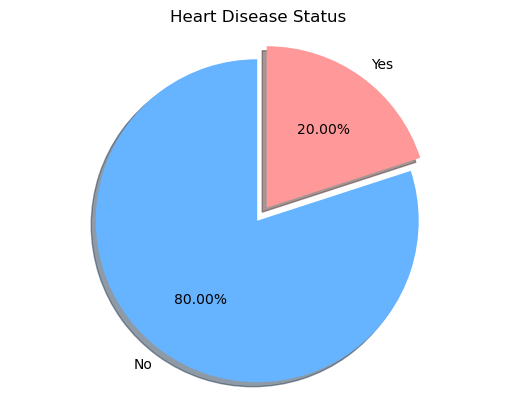

In [17]:
# Distribution table
dist = df['Heart Disease Status'].value_counts (normalize=True). mul(100).round(2)
table = df['Heart Disease Status'].value_counts().to_frame('Count').assign(**{'Percentage (%)': dist})
print(table)

# Pie chart
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)
plt.pie(dist, labels=dist.index, autopct='%.2f%%', colors=colors, explode=explode, startangle=90, shadow=True)
plt.title('Heart Disease Status')
plt.axis('equal')
plt.show()

## 2.3.2 Numerical Variables


In [18]:
numerical =['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

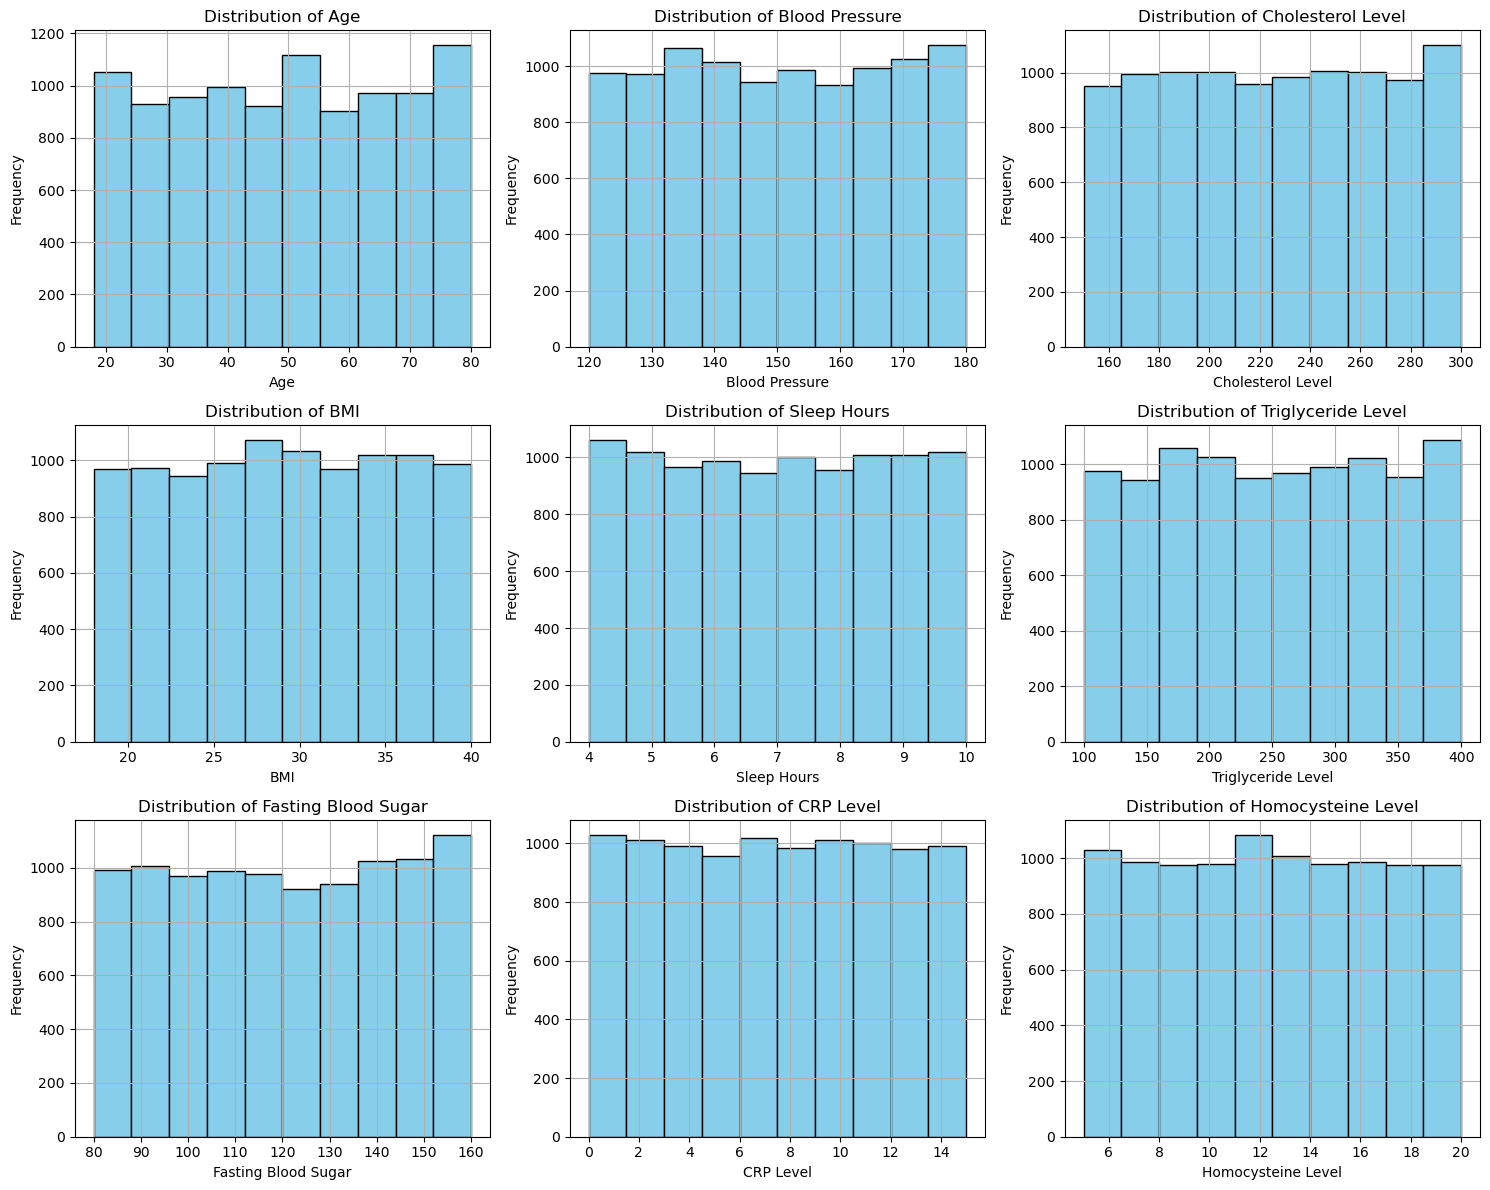

In [19]:
# Display Histogram
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    df[column].hist(bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.3.3 Categorical Variables


In [20]:
categorical = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

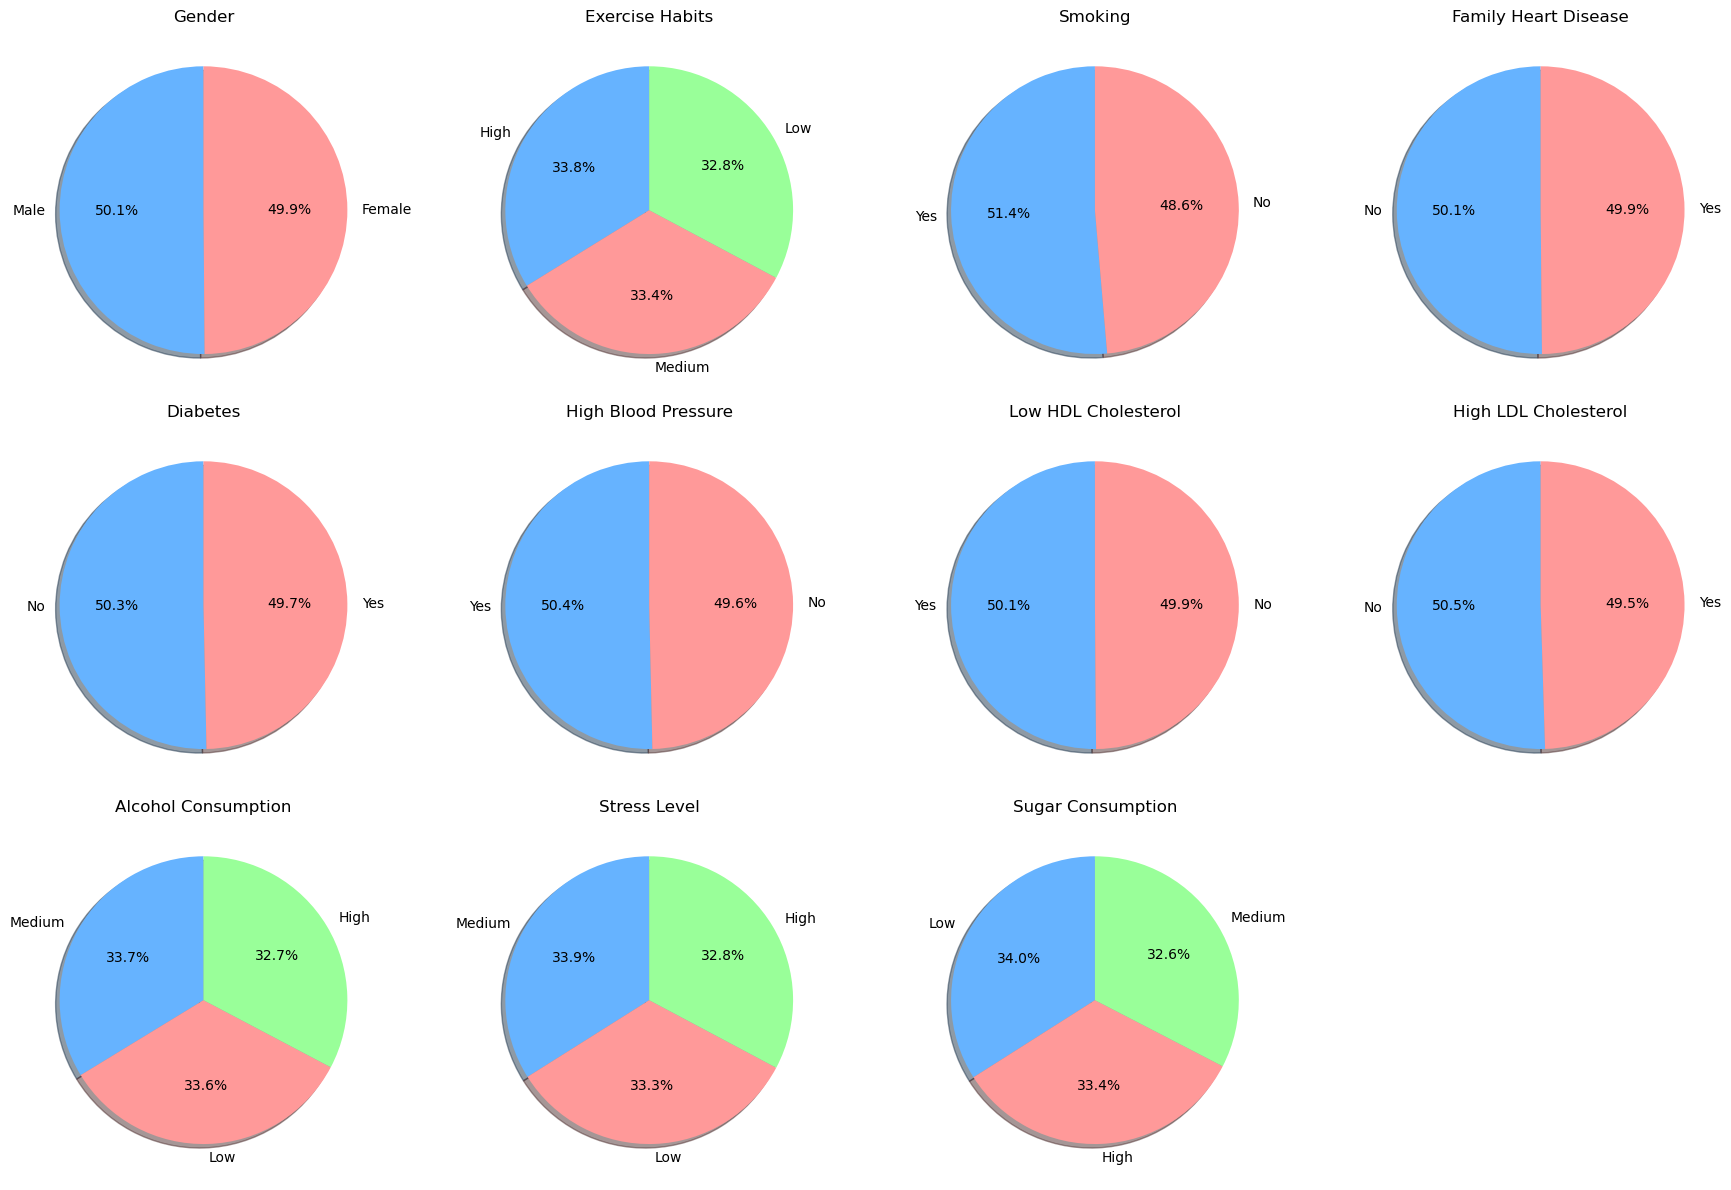

In [21]:
# Display Pie Chart
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate (categorical):
    df[col].value_counts().plot.pie(
        ax=axes[i], autopct='%1.1f%%', startangle=90, shadow=True,
         textprops={'fontsize': 10}, colors=colors
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for ax in axes [len (categorical):]:
    ax.remove()

plt.tight_layout()
plt.show()

## 2.3.4 Relationships Between Independent Variables and Heart Disease Status

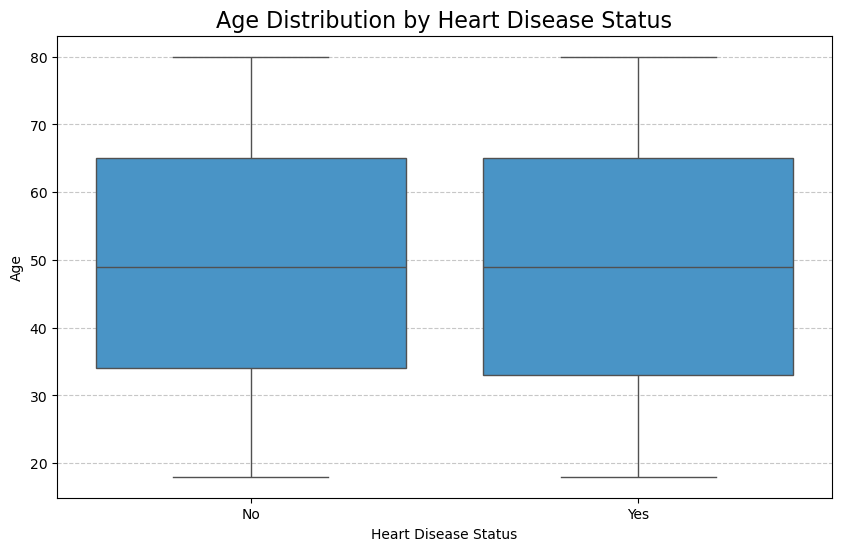

In [22]:
# Set the color palette
colors = ["#3498db", "#e74c3c", "#2ecc71"]  # blue, orange, green
sns.set_palette(colors)

# 1. Age vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Age')
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

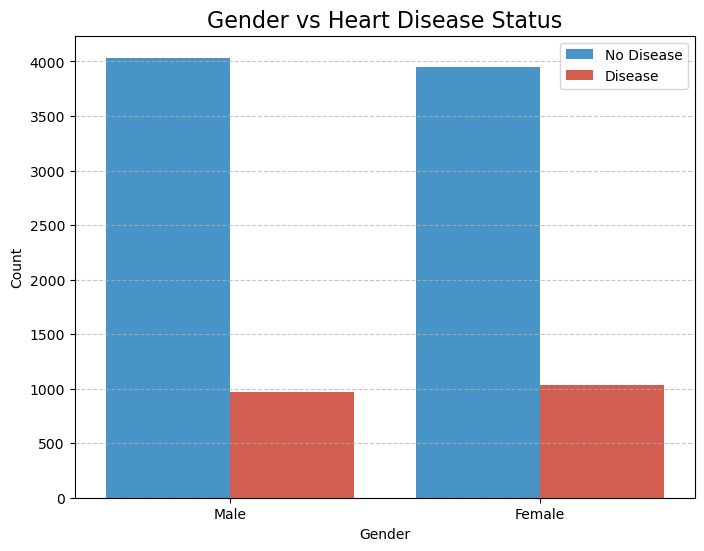

In [23]:
# 2. Gender vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Gender vs Heart Disease Status', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

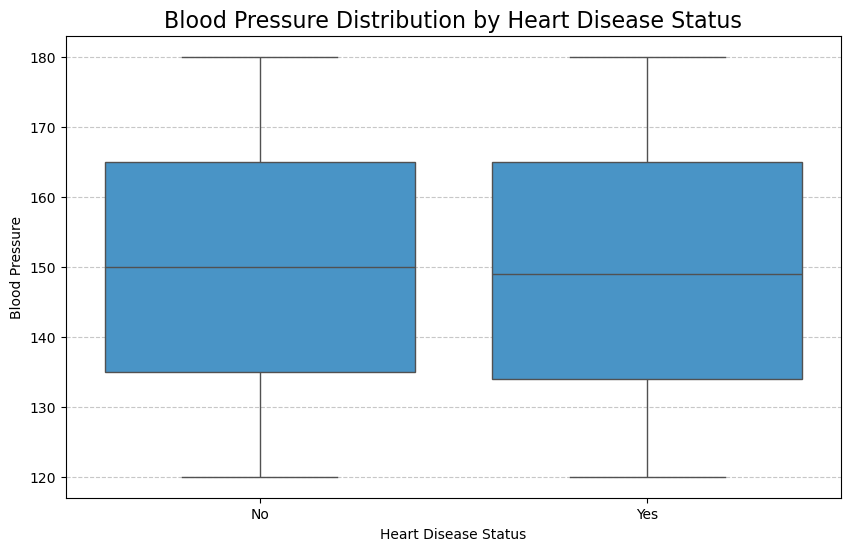

In [24]:
# 3. Blood Pressure vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Blood Pressure')
plt.title('Blood Pressure Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Blood Pressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

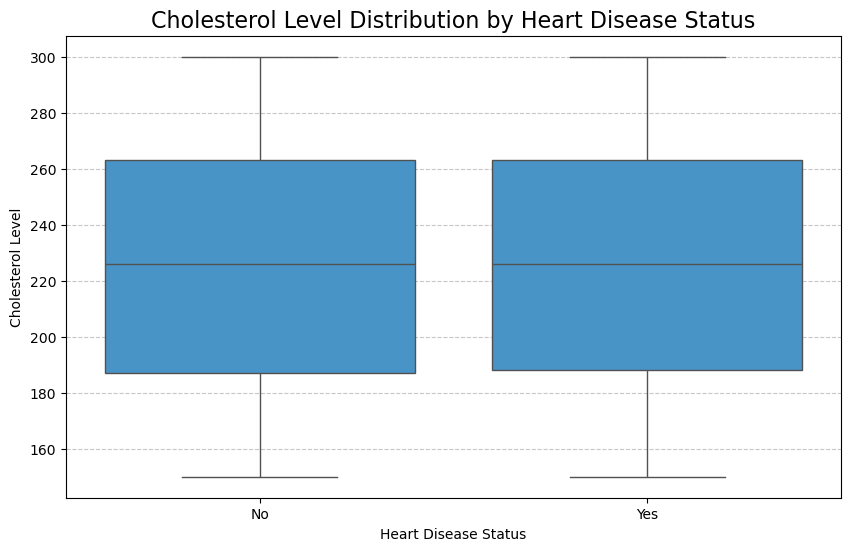

In [25]:
# 4. Cholesterol Level vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Cholesterol Level')
plt.title('Cholesterol Level Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Cholesterol Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

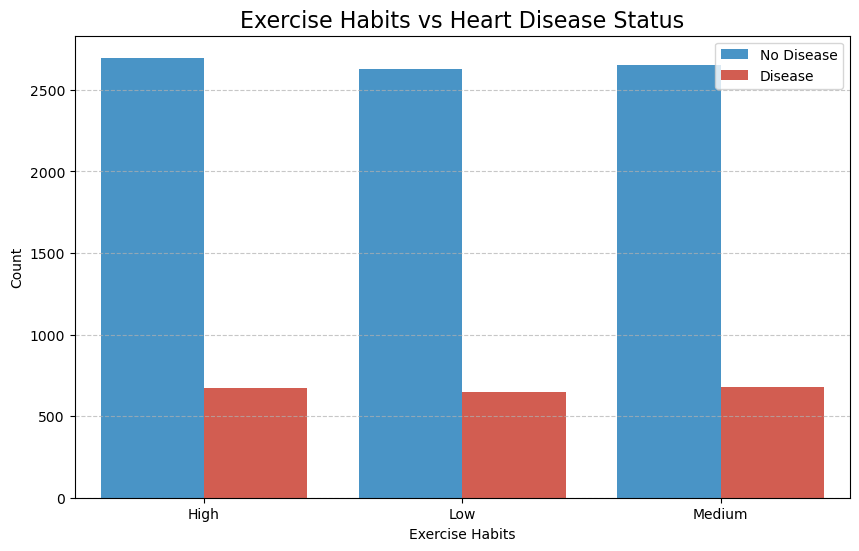

In [26]:
# 5. Exercise Habits vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exercise Habits', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Exercise Habits vs Heart Disease Status', fontsize=16)
plt.xlabel('Exercise Habits')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

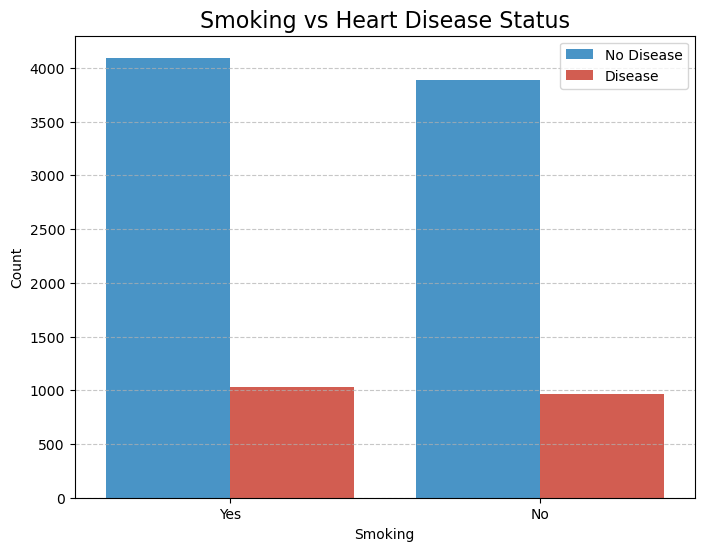

In [27]:
# 6. Smoking vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Smoking vs Heart Disease Status', fontsize=16)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

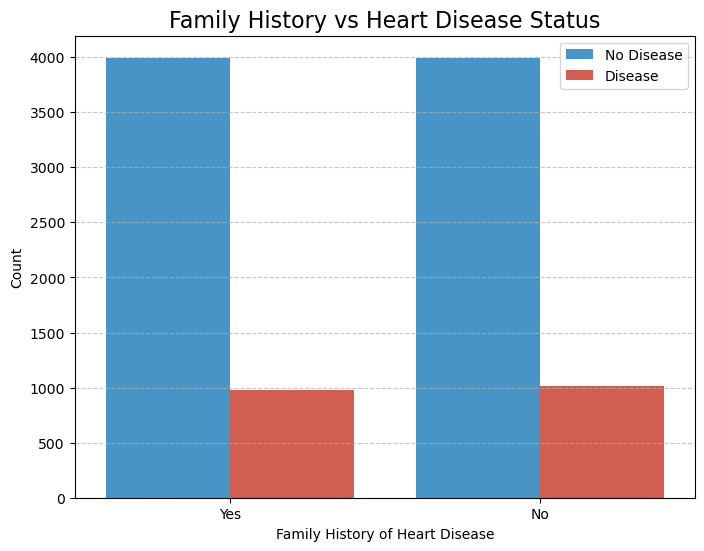

In [28]:
# 7. Family Heart Disease vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family Heart Disease', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Family History vs Heart Disease Status', fontsize=16)
plt.xlabel('Family History of Heart Disease')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

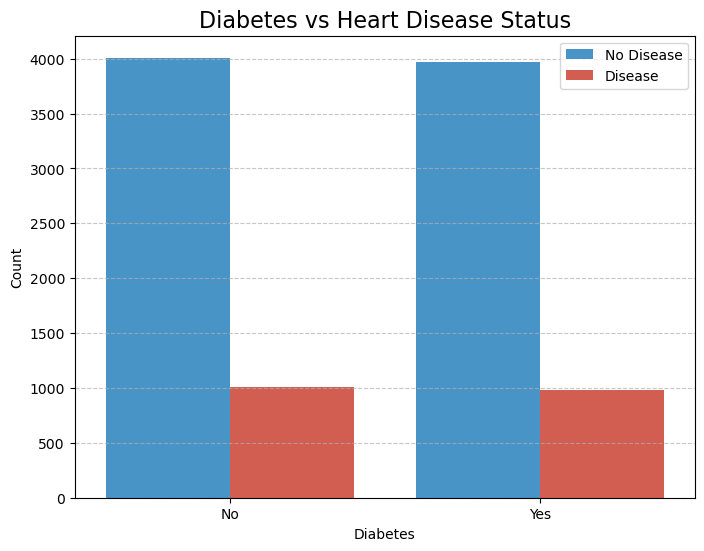

In [29]:
# 8. Diabetes vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Diabetes vs Heart Disease Status', fontsize=16)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

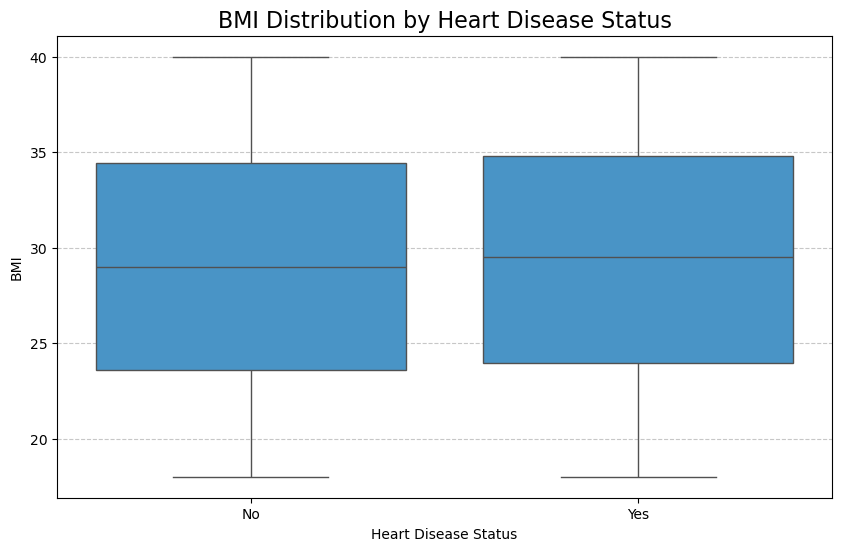

In [30]:
# 9. BMI vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='BMI')
plt.title('BMI Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('BMI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

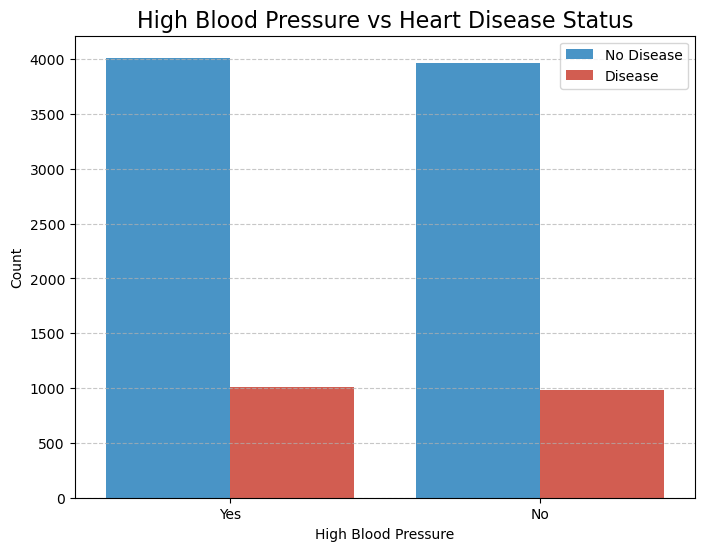

In [31]:
# 10. High Blood Pressure vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='High Blood Pressure', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('High Blood Pressure vs Heart Disease Status', fontsize=16)
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

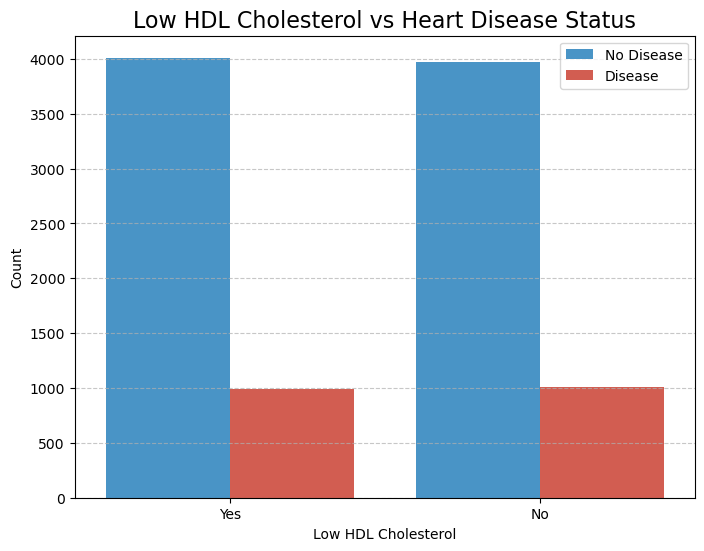

In [32]:
# 11. Low HDL Cholesterol vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Low HDL Cholesterol', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Low HDL Cholesterol vs Heart Disease Status', fontsize=16)
plt.xlabel('Low HDL Cholesterol')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

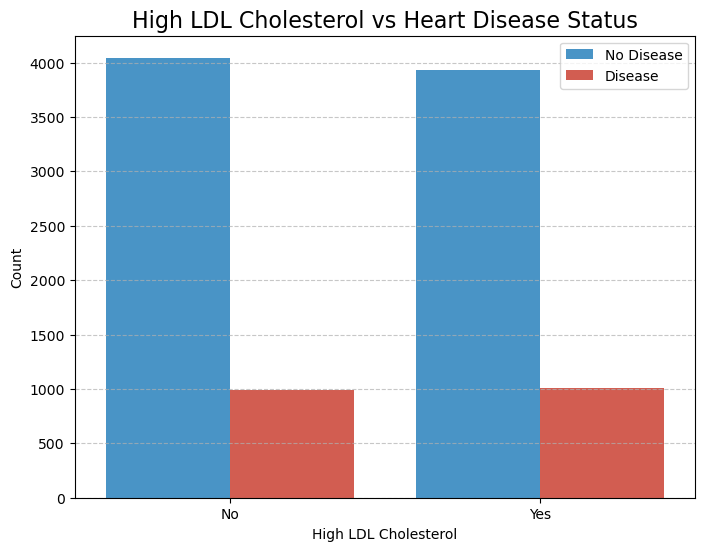

In [33]:
# 12. High LDL Cholesterol vs Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='High LDL Cholesterol', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('High LDL Cholesterol vs Heart Disease Status', fontsize=16)
plt.xlabel('High LDL Cholesterol')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

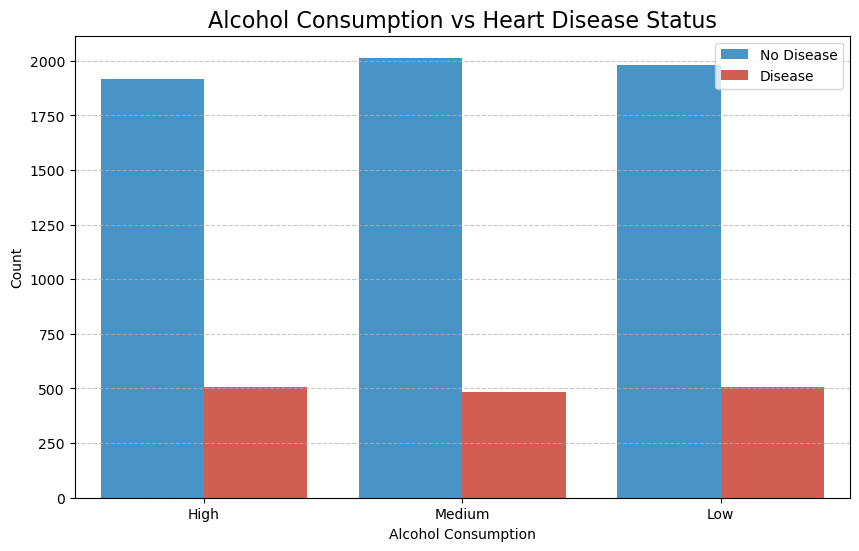

In [34]:
# 13. Alcohol Consumption vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Alcohol Consumption', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Alcohol Consumption vs Heart Disease Status', fontsize=16)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

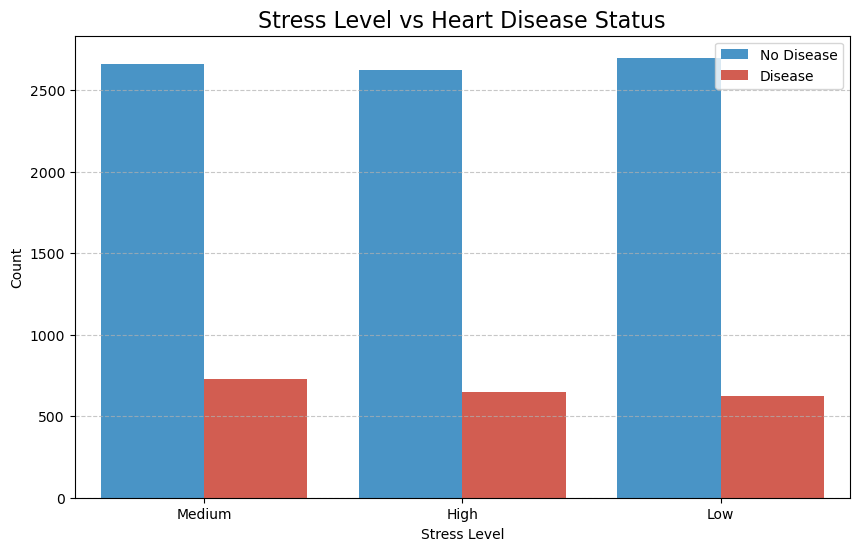

In [35]:
# 14. Stress Level vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Stress Level vs Heart Disease Status', fontsize=16)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

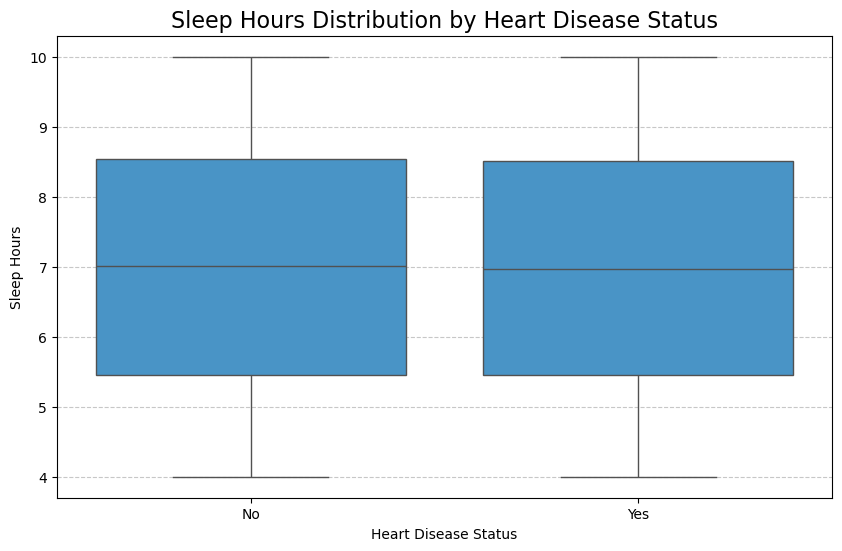

In [36]:
# 15. Sleep Hours vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Sleep Hours')
plt.title('Sleep Hours Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Sleep Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

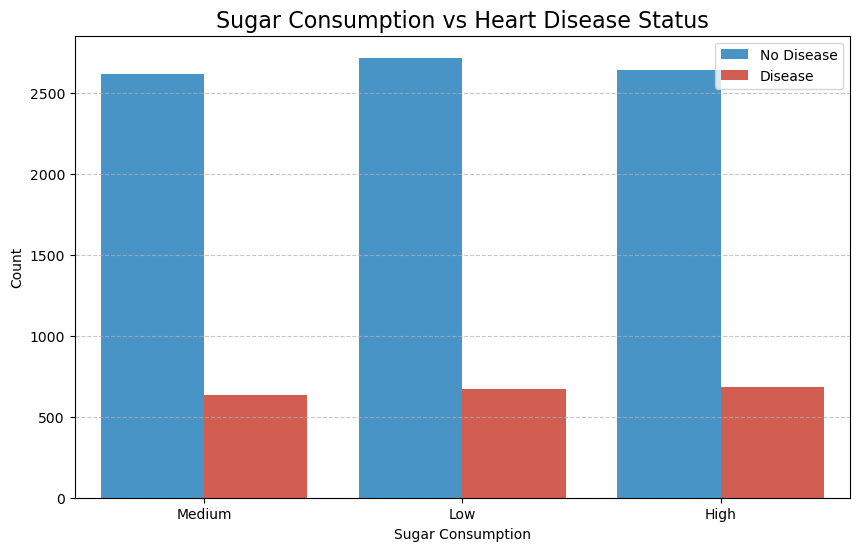

In [37]:
# 16. Sugar Consumption vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sugar Consumption', hue='Heart Disease Status')
plt.legend(['No Disease', 'Disease'])
plt.title('Sugar Consumption vs Heart Disease Status', fontsize=16)
plt.xlabel('Sugar Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

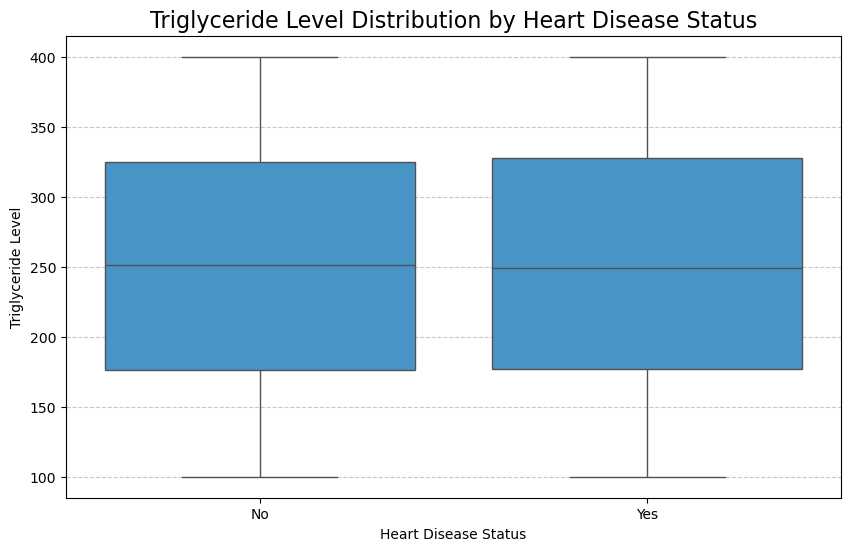

In [38]:
# 17. Triglyceride Level vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Triglyceride Level')
plt.title('Triglyceride Level Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Triglyceride Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

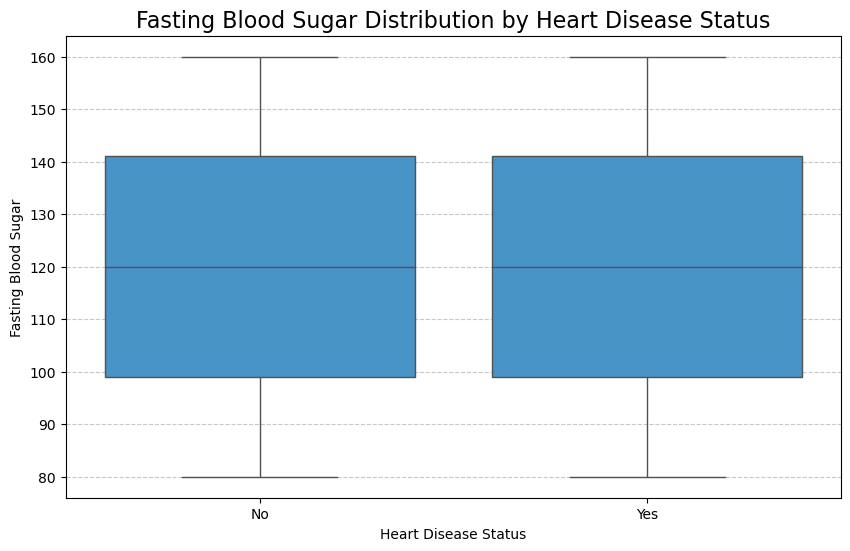

In [39]:
# 18. Fasting Blood Sugar vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Fasting Blood Sugar')
plt.title('Fasting Blood Sugar Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Fasting Blood Sugar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

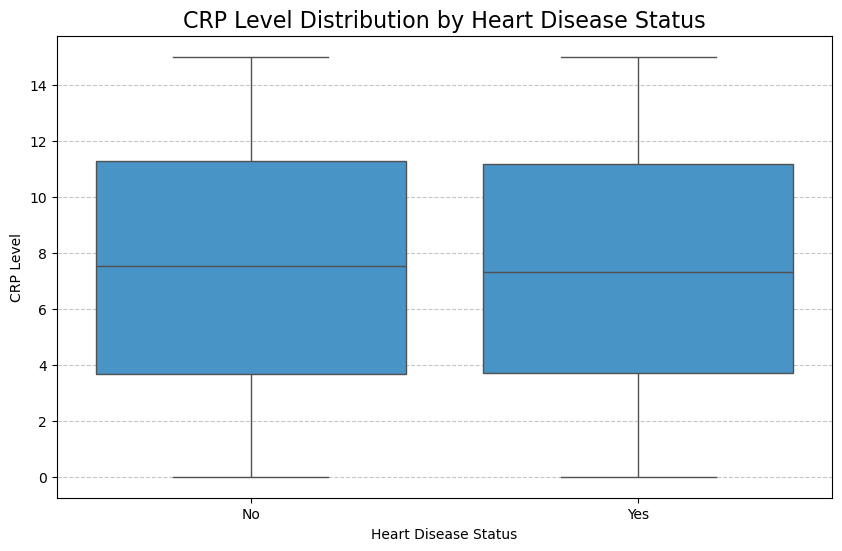

In [40]:
# 19. CRP Level vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='CRP Level')
plt.title('CRP Level Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('CRP Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

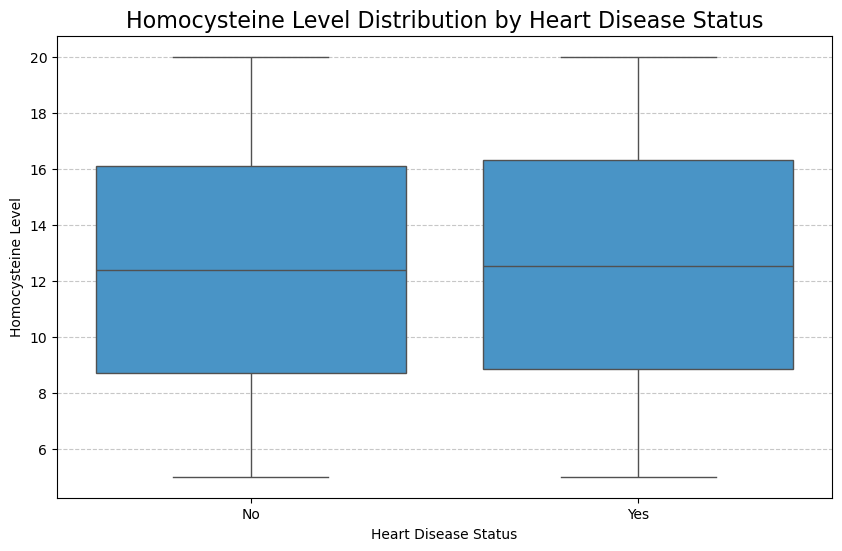

In [41]:
# 20. Homocysteine Level vs Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Homocysteine Level')
plt.title('Homocysteine Level Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status')
plt.ylabel('Homocysteine Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2.4.1 Null Data Detection


In [42]:
# Count of null values in each column
print(df.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


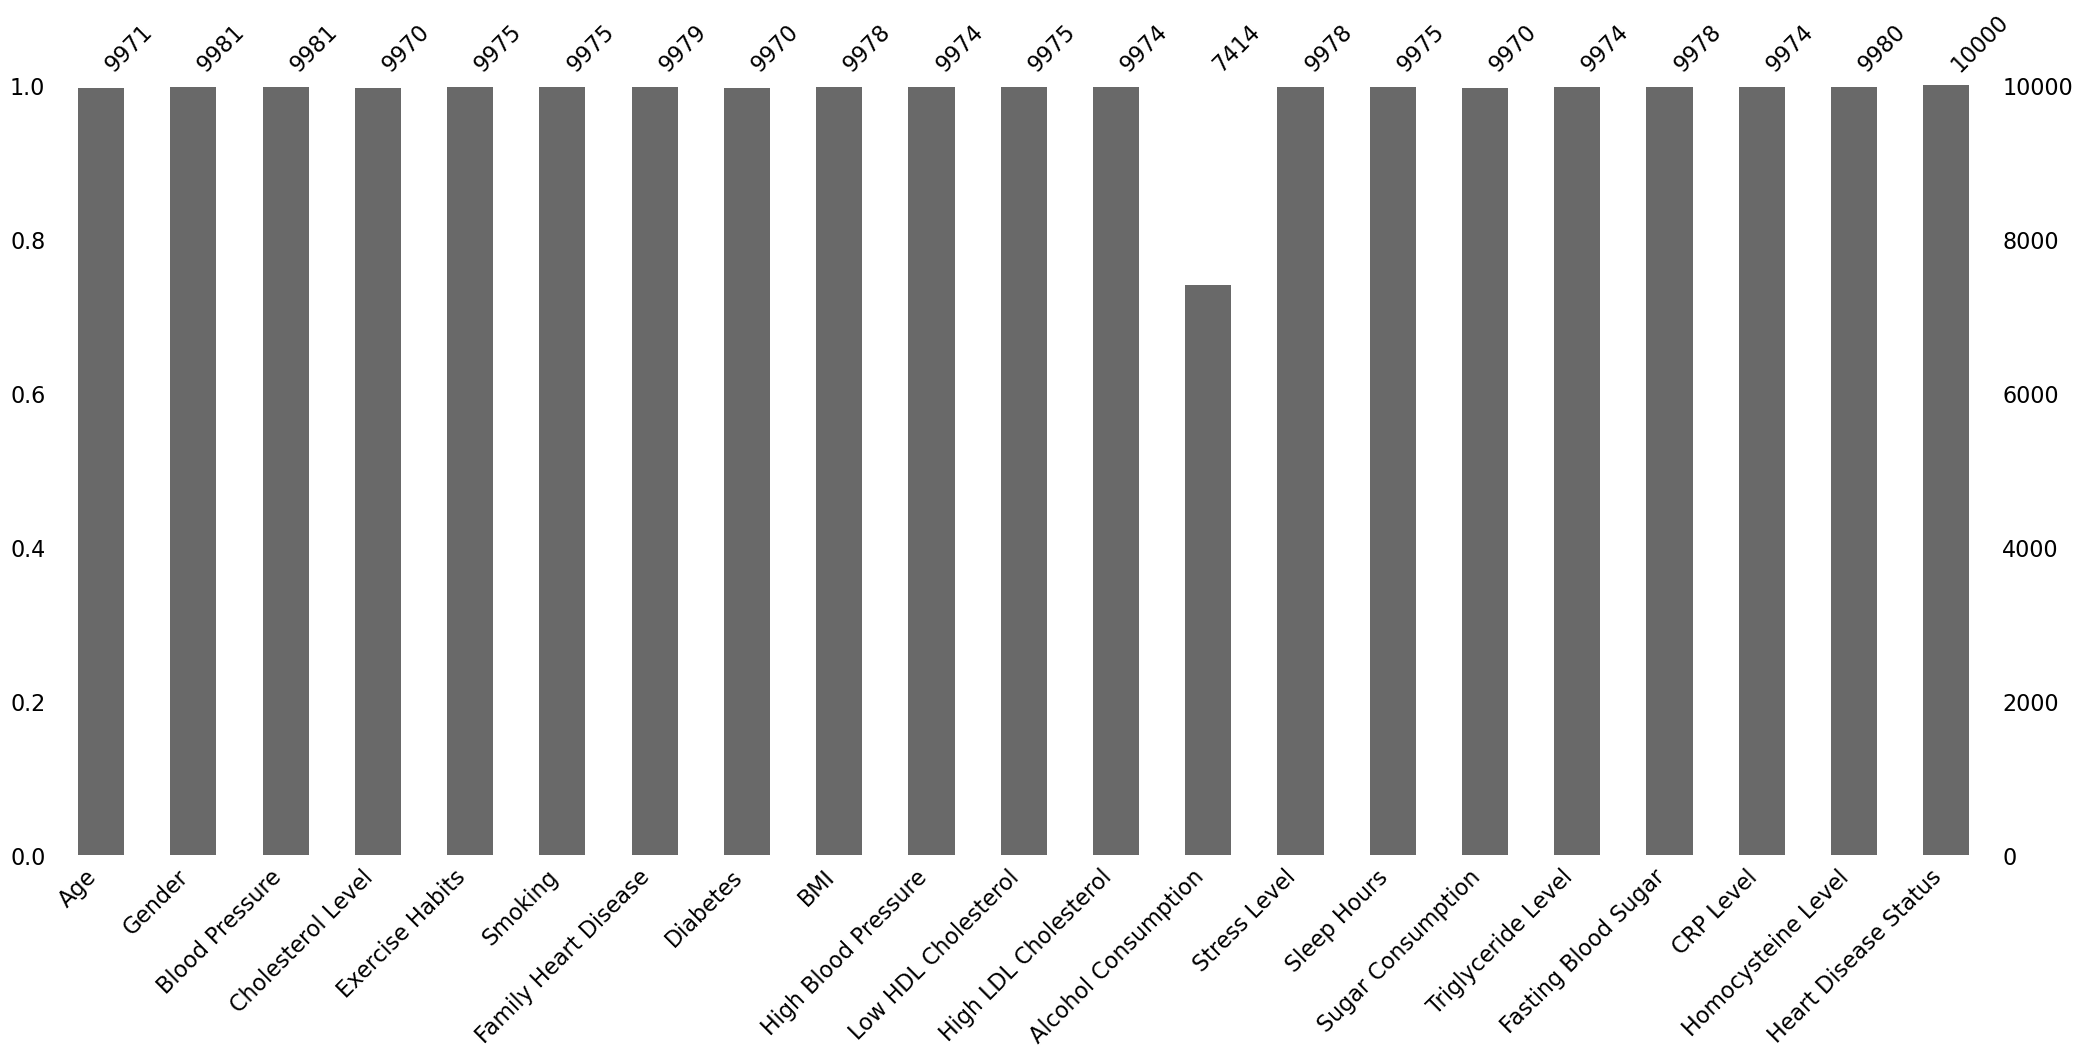

In [43]:
# Visualize missing data using a bar chart
msno.bar(df)
plt.show()

## 2.4.2 Duplicate Data Detection

In [44]:
# Display duplicated rows if any
df.duplicated().sum()

np.int64(0)

## 2.4.3 Outliers Detection


In [45]:
# Select numerical columns
numerical_columns = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
                     'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar',
                     'CRP Level', 'Homocysteine Level']

# Dictionary to store outlier info
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = outlier_rows.shape[0]  # count of outliers

# Print outlier summary
print("Number of outliers detected in each numerical column using IQR:\n")
for col, count in outliers.items():
    print(f"{col:<20} : {count}")

Number of outliers detected in each numerical column using IQR:

Age                  : 0
Blood Pressure       : 0
Cholesterol Level    : 0
BMI                  : 0
Sleep Hours          : 0
Triglyceride Level   : 0
Fasting Blood Sugar  : 0
CRP Level            : 0
Homocysteine Level   : 0


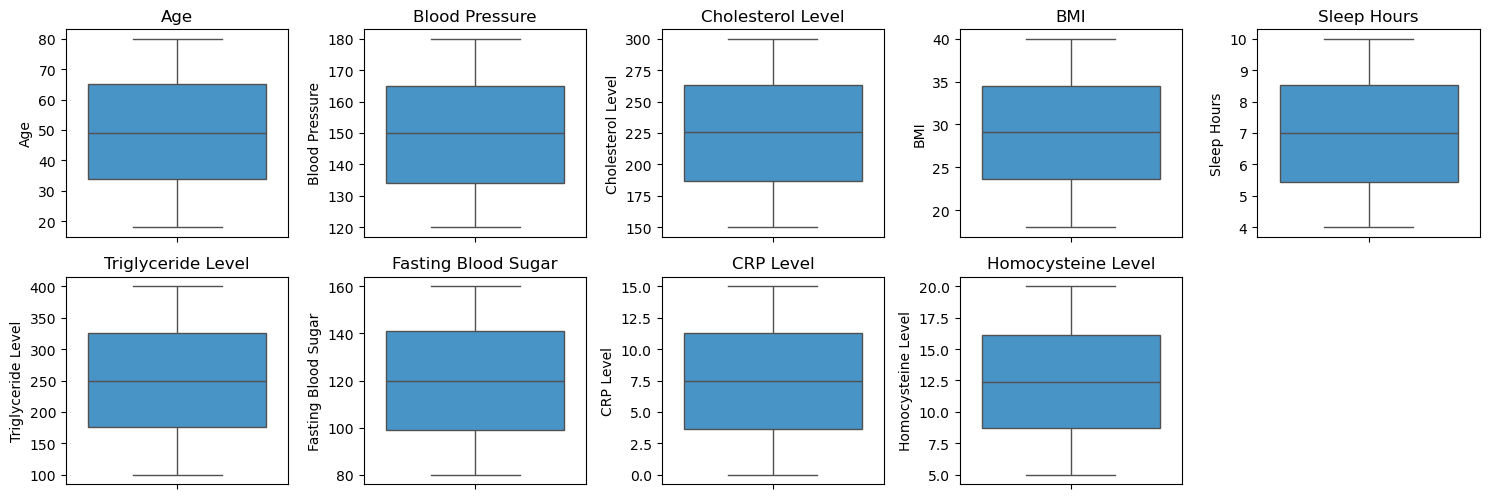

In [46]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set figure size
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, col in enumerate (numerical_columns, 1):
  plt.subplot(4, 5, i)                          # Adjust rows/columns based on how many variables
  sns.boxplot(data=df, y=col)
  plt.title(col)
  plt.tight_layout()

plt.show()

## **Data Preparation**

## 3.1 Missing values

In [47]:
df_cleaned = df.dropna()

print("Original dataset shape        :", df.shape)
print("After removing missing values :", df_cleaned.shape)
print("\nRemaining missing values:\n ")
df_cleaned.isnull().sum()

Original dataset shape        : (10000, 21)
After removing missing values : (7067, 21)

Remaining missing values:
 


Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

## 3.2 Data Encoding for Categorical Variables

In [48]:
# Copy dataset for encoding
df_encoded = df_cleaned.copy()

In [49]:
# Label encode ordinal categorical variables
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
label_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
for col in label_cols:
    df_encoded[col] = df_encoded[col].map(label_map)

df_encoded[label_cols].head(5)

,Exercise Habits,Alcohol Consumption,Stress Level,Sugar Consumption
1,2,1,2,1
2,0,0,0,0
3,2,0,2,2
4,0,0,2,2
5,0,0,1,0


In [50]:
# One-Hot encode 7 binary columns
one_hot_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
                'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Convert boolean True/False columns to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Display the first 5 rows to check the encoding
df_encoded[bool_cols].head(5)

,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,0,0,1,1,0,1,0
2,1,0,0,0,0,1,1
3,0,1,1,0,1,0,1
4,1,1,1,1,1,0,0
5,1,1,0,0,0,0,0


In [51]:
# Encode target variable
df_encoded['Heart Disease Status'] = df_encoded['Heart Disease Status'].map({'Yes': 1, 'No': 0})

df_encoded['Heart Disease Status'].head(5)

1    0
2    0
3    0
4    0
5    0
Name: Heart Disease Status, dtype: int64

In [52]:
df_encoded

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,69.0,146.0,286.0,2,25.221799,1,2,8.744034,1,133.0,...,9.355389,19.298875,0,0,0,1,1,0,1,0
2,46.0,126.0,216.0,0,29.855447,0,0,4.440440,0,393.0,...,12.709873,11.230926,0,1,0,0,0,0,1,1
3,32.0,122.0,293.0,2,24.130477,0,2,5.249405,2,293.0,...,12.509046,5.961958,0,0,1,1,0,1,0,1
4,60.0,166.0,242.0,0,20.486289,0,2,7.030971,2,263.0,...,10.381259,8.153887,0,1,1,1,1,1,0,0
5,25.0,152.0,257.0,0,28.144681,0,1,5.504876,0,126.0,...,4.297575,10.815983,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,169.0,291.0,1,22.839718,1,0,6.057509,2,299.0,...,3.321020,11.910244,1,0,1,0,0,0,1,0
9994,73.0,144.0,191.0,1,39.459620,1,0,7.549114,1,200.0,...,1.154904,8.021732,1,0,1,1,1,0,0,0
9995,25.0,136.0,243.0,1,18.788791,1,2,6.834954,1,343.0,...,3.588814,19.132004,1,0,1,0,0,1,0,1
9998,23.0,142.0,299.0,0,34.964026,1,2,8.526329,1,113.0,...,7.215634,11.873486,1,1,1,0,1,1,0,1


## 3.3 Relation Analysis

In [53]:
X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status'].astype(int)

# Identify discrete features (categorical)
discrete_features = [True if col in ['Gender_Male', 'Exercise Habits', 'Smoking_Yes', 'Family Heart Disease_Yes',
                                     'Diabetes_Yes', 'High Blood Pressure_Yes', 'Low HDL Cholesterol_Yes',
                                     'High LDL Cholesterol_Yes', 'Stress Level', 'Sugar Consumption']
                     else False for col in X.columns]

# Use mutual information with discrete_features parameter
mi = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Mutual Information with Heart Disease Status:\n", mi_scores)

Mutual Information with Heart Disease Status:
 Fasting Blood Sugar         0.008996
BMI                         0.007025
Cholesterol Level           0.004939
Sleep Hours                 0.004172
Age                         0.002948
Stress Level                0.000540
Sugar Consumption           0.000256
Exercise Habits             0.000092
Gender_Male                 0.000034
Smoking_Yes                 0.000020
High Blood Pressure_Yes     0.000016
Family Heart Disease_Yes    0.000003
Diabetes_Yes                0.000002
Low HDL Cholesterol_Yes     0.000002
High LDL Cholesterol_Yes    0.000002
Blood Pressure              0.000000
CRP Level                   0.000000
Triglyceride Level          0.000000
Alcohol Consumption         0.000000
Homocysteine Level          0.000000
dtype: float64


Correlation of all features with Heart Disease Status:

Heart Disease Status        1.000000
Sugar Consumption           0.022610
BMI                         0.021957
Homocysteine Level          0.011784
Triglyceride Level          0.011631
Cholesterol Level           0.008652
Sleep Hours                 0.007656
Stress Level                0.007123
Alcohol Consumption         0.007093
Smoking_Yes                 0.006400
High LDL Cholesterol_Yes    0.001849
Fasting Blood Sugar         0.001399
Low HDL Cholesterol_Yes    -0.001984
Diabetes_Yes               -0.002073
Family Heart Disease_Yes   -0.002237
CRP Level                  -0.005395
High Blood Pressure_Yes    -0.005687
Age                        -0.006233
Gender_Male                -0.008227
Exercise Habits            -0.010444
Blood Pressure             -0.019111
Name: Heart Disease Status, dtype: float64


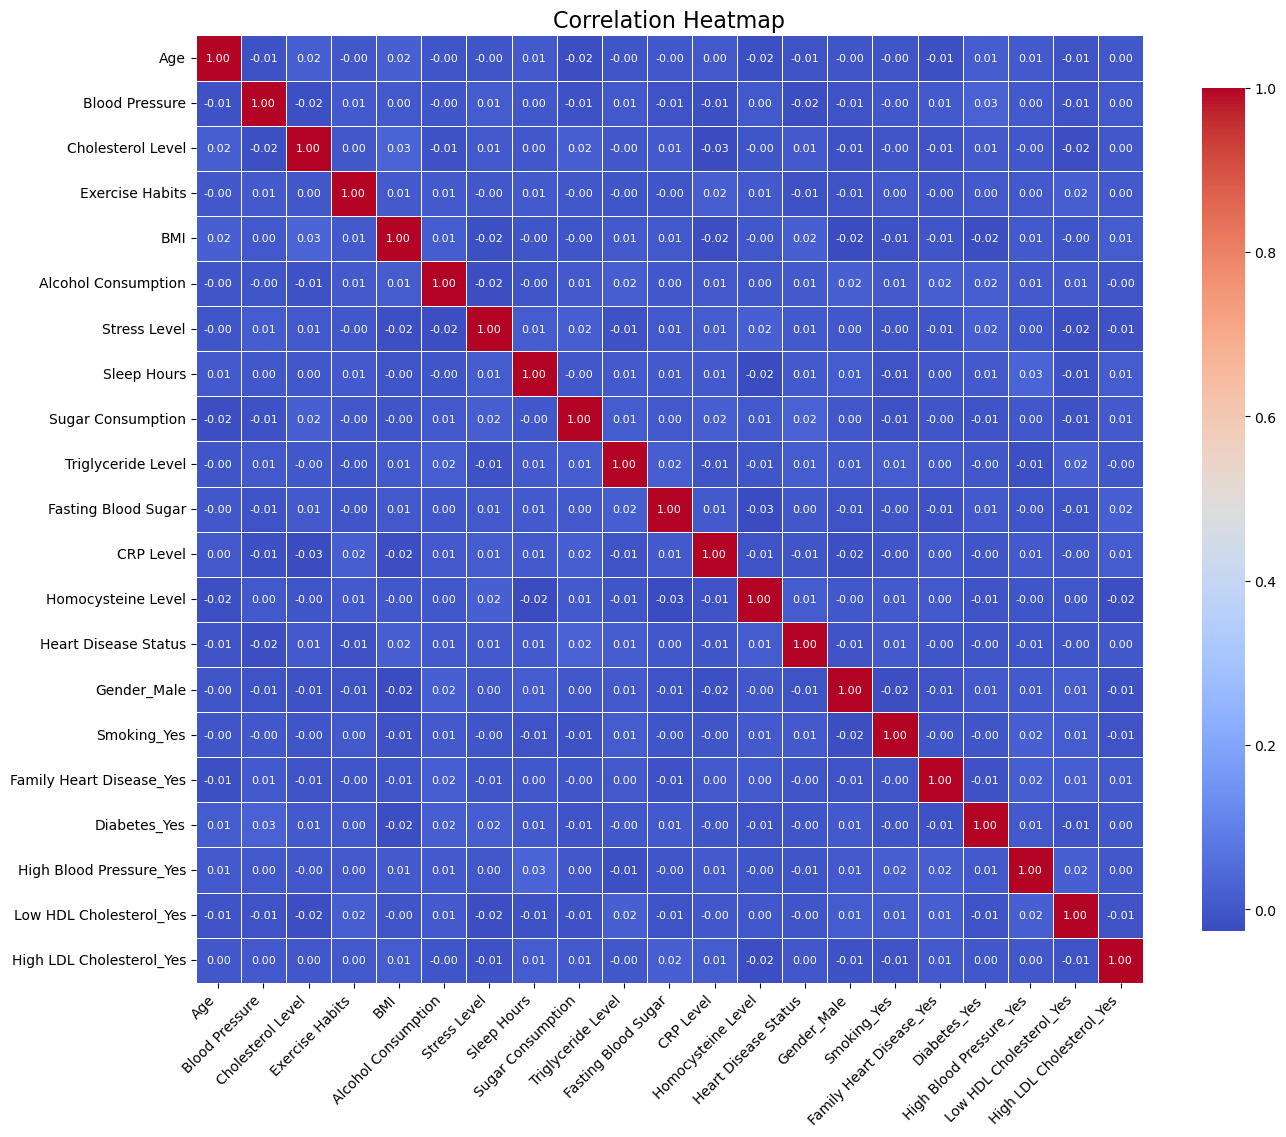

In [54]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()
target_corr = corr_matrix['Heart Disease Status'].sort_values(ascending=False)
print("Correlation of all features with Heart Disease Status:\n")
print(target_corr)
# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Select Attribures

In [55]:
# --- Manual Feature Selection ---
selected_features = [
    'Fasting Blood Sugar',
    'BMI',
    'Cholesterol Level',
    'Sleep Hours',
    'Age',
    'Stress Level',
    'Sugar Consumption',
    'Exercise Habits',
    'Gender_Male',
    'Smoking_Yes',
    'High Blood Pressure_Yes'
]

# Create new dataset with only selected features + target variable
X_selected = df_encoded[selected_features]
y = df_encoded['Heart Disease Status'].astype(int)   # target variable

# Combine features + target into a new dataframe
df_selected = pd.concat([X_selected, y], axis=1)

print("\nSelected dataset shape:", df_selected.shape)
print("\nPreview of selected dataset:\n", df_selected.head())



Selected dataset shape: (7067, 12)

Preview of selected dataset:
    Fasting Blood Sugar        BMI  Cholesterol Level  Sleep Hours   Age  \
1                157.0  25.221799              286.0     8.744034  69.0   
2                 92.0  29.855447              216.0     4.440440  46.0   
3                 94.0  24.130477              293.0     5.249405  32.0   
4                154.0  20.486289              242.0     7.030971  60.0   
5                 91.0  28.144681              257.0     5.504876  25.0   

   Stress Level  Sugar Consumption  Exercise Habits  Gender_Male  Smoking_Yes  \
1             2                  1                2            0            0   
2             0                  0                0            1            0   
3             2                  2                2            0            1   
4             2                  2                0            1            1   
5             1                  0                0            1            1

## 3.4 Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Copy selected dataset
df_selected_normalized = df_selected.copy()

# Columns to normalize (continuous features)
cols_to_normalize = ['Fasting Blood Sugar', 'BMI', 'Cholesterol Level',
                     'Sleep Hours', 'Age']

# Apply MinMax normalization (0–1 scaling)
scaler = MinMaxScaler()
df_selected_normalized[cols_to_normalize] = scaler.fit_transform(df_selected_normalized[cols_to_normalize])

print("\nNormalized dataset shape:", df_selected_normalized.shape)
print("\nPreview of normalized dataset:\n", df_selected_normalized.head())



Normalized dataset shape: (7067, 12)

Preview of normalized dataset:
    Fasting Blood Sugar       BMI  Cholesterol Level  Sleep Hours       Age  \
1               0.9625  0.328093           0.906667     0.790657  0.822581   
2               0.1500  0.538811           0.440000     0.073314  0.451613   
3               0.1750  0.278465           0.953333     0.208156  0.225806   
4               0.9250  0.112744           0.613333     0.505116  0.677419   
5               0.1375  0.461013           0.713333     0.250739  0.112903   

   Stress Level  Sugar Consumption  Exercise Habits  Gender_Male  Smoking_Yes  \
1             2                  1                2            0            0   
2             0                  0                0            1            0   
3             2                  2                2            0            1   
4             2                  2                0            1            1   
5             1                  0                0    

## 3.5 Train Test Split

In [57]:
# Check distribution in the whole dataset
print("Overall distribution of Heart Disease Status:")
print(y.value_counts())

# 60/40 split
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    df_selected_normalized, y, test_size=0.4, random_state=42, stratify=y
)

print("\n60/40 Split Distribution:")
print("Train:\n", y_train_60.value_counts())
print("Test:\n", y_test_40.value_counts())

# 70/30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    df_selected_normalized, y, test_size=0.3, random_state=42, stratify=y
)

print("\n70/30 Split Distribution:")
print("Train:\n", y_train_70.value_counts())
print("Test:\n", y_test_30.value_counts())

# 80/20 split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    df_selected_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print("\n80/20 Split Distribution:")
print("Train:\n", y_train_80.value_counts())
print("Test:\n", y_test_20.value_counts())


Overall distribution of Heart Disease Status:
Heart Disease Status
0    5632
1    1435
Name: count, dtype: int64

60/40 Split Distribution:
Train:
 Heart Disease Status
0    3379
1     861
Name: count, dtype: int64
Test:
 Heart Disease Status
0    2253
1     574
Name: count, dtype: int64

70/30 Split Distribution:
Train:
 Heart Disease Status
0    3942
1    1004
Name: count, dtype: int64
Test:
 Heart Disease Status
0    1690
1     431
Name: count, dtype: int64

80/20 Split Distribution:
Train:
 Heart Disease Status
0    4505
1    1148
Name: count, dtype: int64
Test:
 Heart Disease Status
0    1127
1     287
Name: count, dtype: int64


## 4.1 Imbalance Data (SMOTE)

60/40 Split after SMOTE:
Training set size: (6758, 11) (6758,)
Class distribution after SMOTE:
 Heart Disease Status
0    3379
1    3379
Name: count, dtype: int64


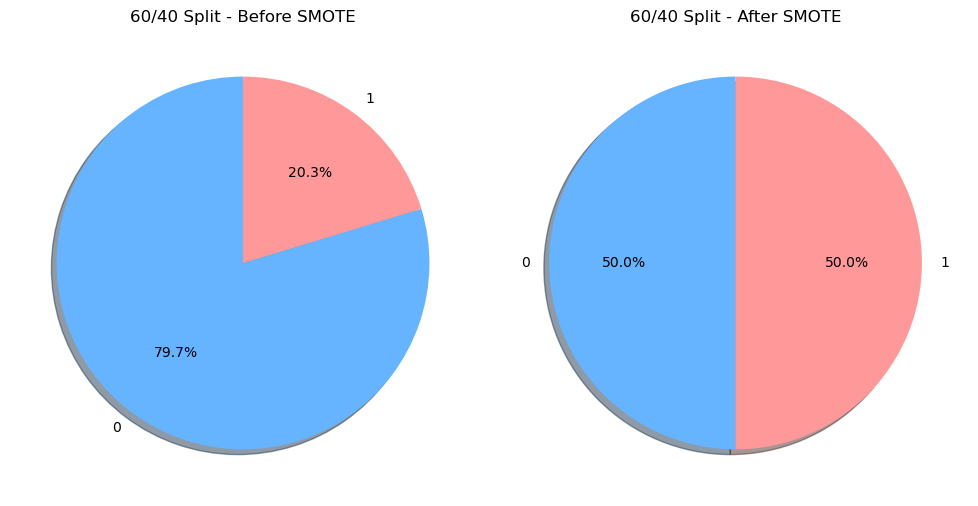

70/30 Split after SMOTE:
Training set size: (7884, 11) (7884,)
Class distribution after SMOTE:
 Heart Disease Status
1    3942
0    3942
Name: count, dtype: int64


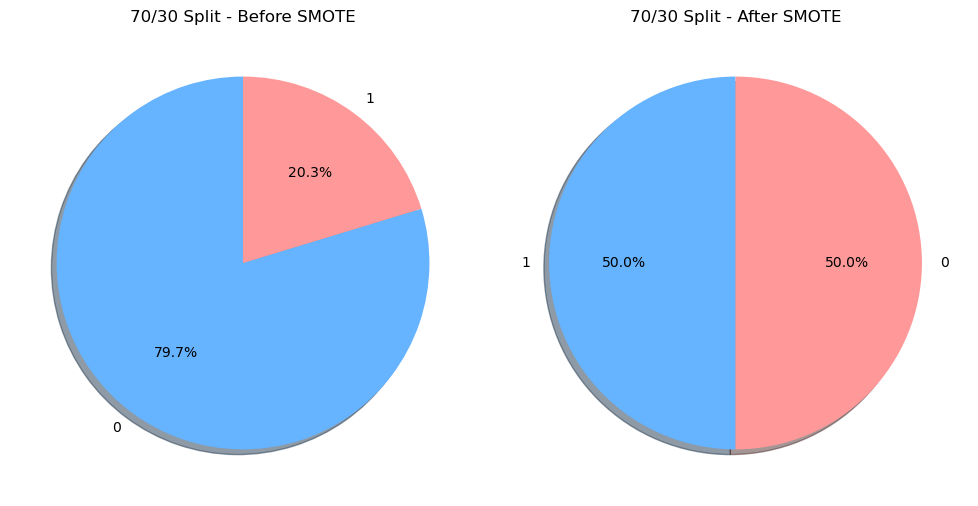


80/20 Split after SMOTE:
Training set size: (9010, 11) (9010,)
Class distribution after SMOTE:
 Heart Disease Status
0    4505
1    4505
Name: count, dtype: int64


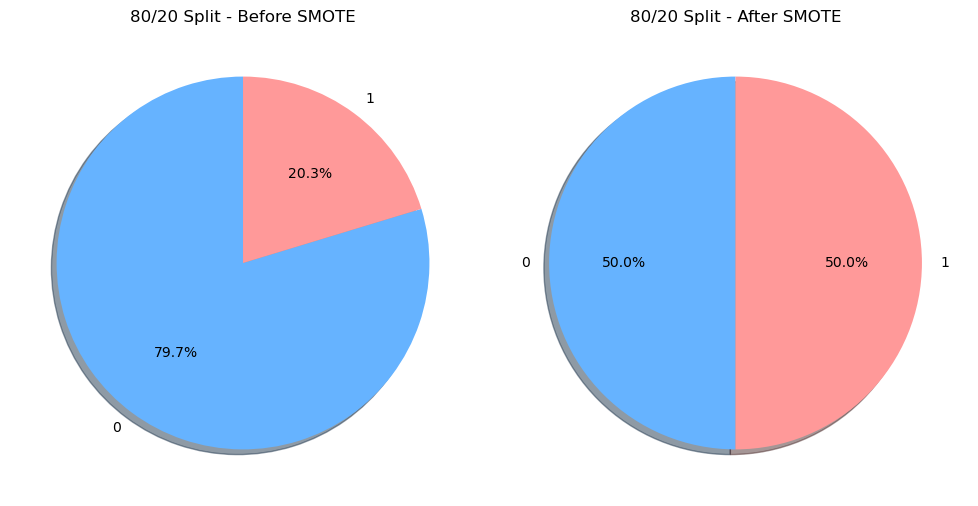

In [58]:
from imblearn.over_sampling import SMOTE

# Function to plot before/after SMOTE distribution
def plot_before_after(y_before, y_after, split_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Before SMOTE
    y_before.value_counts().plot.pie(
        ax=axes[0],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=['#66b3ff', '#ff9999']
    )
    axes[0].set_title(f"{split_name} - Before SMOTE")
    axes[0].set_ylabel("")

    # After SMOTE
    y_after.value_counts().plot.pie(
        ax=axes[1],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=['#66b3ff', '#ff9999']
    )
    axes[1].set_title(f"{split_name} - After SMOTE")
    axes[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

# 60/40 Split
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    df_selected_normalized.drop('Heart Disease Status', axis=1),
    df_selected_normalized['Heart Disease Status'],
    test_size=0.4,
    random_state=42,
    stratify=df_selected_normalized['Heart Disease Status']
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_60_sm, y_train_60_sm = smote.fit_resample(X_train_60, y_train_60)

print("60/40 Split after SMOTE:")
print("Training set size:", X_train_60_sm.shape, y_train_60_sm.shape)
print("Class distribution after SMOTE:\n", y_train_60_sm.value_counts())

plot_before_after(y_train_60, y_train_60_sm, "60/40 Split")

# 70/30 Split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    df_selected_normalized.drop('Heart Disease Status', axis=1),
    df_selected_normalized['Heart Disease Status'],
    test_size=0.3,
    random_state=42,
    stratify=df_selected_normalized['Heart Disease Status']
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_70_sm, y_train_70_sm = smote.fit_resample(X_train_70, y_train_70)

print("70/30 Split after SMOTE:")
print("Training set size:", X_train_70_sm.shape, y_train_70_sm.shape)
print("Class distribution after SMOTE:\n", y_train_70_sm.value_counts())

plot_before_after(y_train_70, y_train_70_sm, "70/30 Split")

# 80/20 Split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    df_selected_normalized.drop('Heart Disease Status', axis=1),
    df_selected_normalized['Heart Disease Status'],
    test_size=0.2,
    random_state=42,
    stratify=df_selected_normalized['Heart Disease Status']
)

# Apply SMOTE
X_train_80_sm, y_train_80_sm = smote.fit_resample(X_train_80, y_train_80)

print("\n80/20 Split after SMOTE:")
print("Training set size:", X_train_80_sm.shape, y_train_80_sm.shape)
print("Class distribution after SMOTE:\n", y_train_80_sm.value_counts())

plot_before_after(y_train_80, y_train_80_sm, "80/20 Split")


## 4.3 Apply model

## 4.3.1 K-Nearest Neighbor (KNN)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- KNN with GridSearchCV on 60/40 Split ---
param_grid = {
    'n_neighbors': list(range(3, 21)),  # Try k from 3 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting methods
    'p': [1, 2]  # Manhattan (1) and Euclidean (2)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_60_sm, y_train_60_sm)

# Best model
best_knn = grid_search.best_estimator_

# Predict on test set (X_test_30, untouched by SMOTE)
y_pred = best_knn.predict(X_test_40)
y_proba = best_knn.predict_proba(X_test_40)[:, 1]

# Evaluate
knn_acc_6040 = accuracy_score(y_test_40, y_pred)
knn_prec_6040 = precision_score(y_test_40, y_pred)
knn_rec_6040 = recall_score(y_test_40, y_pred)
knn_f1_6040 = f1_score(y_test_40, y_pred)
knn_roc_6040 = roc_auc_score(y_test_40, y_proba)

conf_matrix = confusion_matrix(y_test_40, y_pred)
class_report = classification_report(y_test_40, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nKNN Performance (60/40 Split):")
print("Accuracy:", knn_acc_6040)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", knn_roc_6040)

Best Parameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

KNN Performance (60/40 Split):
Accuracy: 0.563494870887867

Confusion Matrix:
 [[1367  886]
 [ 348  226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.69      2253
           1       0.20      0.39      0.27       574

    accuracy                           0.56      2827
   macro avg       0.50      0.50      0.48      2827
weighted avg       0.68      0.56      0.60      2827

ROC-AUC Score: 0.4870161503593351


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- KNN with GridSearchCV on 70/30 Split ---
param_grid = {
    'n_neighbors': list(range(3, 21)),  # Try k from 3 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting methods
    'p': [1, 2]  # Manhattan (1) and Euclidean (2)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_70_sm, y_train_70_sm)

# Best model
best_knn = grid_search.best_estimator_

# Predict on test set (X_test_30, untouched by SMOTE)
y_pred = best_knn.predict(X_test_30)
y_proba = best_knn.predict_proba(X_test_30)[:, 1]

# Evaluate
knn_acc_7030 = accuracy_score(y_test_30, y_pred)
knn_prec_7030 = precision_score(y_test_30, y_pred)
knn_rec_7030 = recall_score(y_test_30, y_pred)
knn_f1_7030 = f1_score(y_test_30, y_pred)
knn_roc_7030 = roc_auc_score(y_test_30, y_proba)

conf_matrix = confusion_matrix(y_test_30, y_pred)
class_report = classification_report(y_test_30, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nKNN Performance (70/30 Split):")
print("Accuracy:", knn_acc_7030)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", knn_roc_7030)

Best Parameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

KNN Performance (70/30 Split):
Accuracy: 0.5615275813295615

Confusion Matrix:
 [[1031  659]
 [ 271  160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69      1690
           1       0.20      0.37      0.26       431

    accuracy                           0.56      2121
   macro avg       0.49      0.49      0.47      2121
weighted avg       0.67      0.56      0.60      2121

ROC-AUC Score: 0.4805282884169195


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- KNN with GridSearchCV on 80/20 Split ---
param_grid = {
    'n_neighbors': list(range(3, 21)),  # Try k from 3 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting methods
    'p': [1, 2]  # Manhattan (1) and Euclidean (2)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_80_sm, y_train_80_sm)

# Best model
best_knn = grid_search.best_estimator_

# Predict on test set (X_test_20, untouched by SMOTE)
y_pred = best_knn.predict(X_test_20)
y_proba = best_knn.predict_proba(X_test_20)[:, 1]

# Evaluate
knn_acc_8020 = accuracy_score(y_test_20, y_pred)
knn_prec_8020 = precision_score(y_test_20, y_pred)
knn_rec_8020 = recall_score(y_test_20, y_pred)
knn_f1_8020 = f1_score(y_test_20, y_pred)
knn_roc_8020 = roc_auc_score(y_test_20, y_proba)

conf_matrix = confusion_matrix(y_test_20, y_pred)
class_report = classification_report(y_test_20, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nKNN Performance (80/20 Split):")
print("Accuracy:", knn_acc_8020)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", knn_roc_8020)

Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

KNN Performance (80/20 Split):
Accuracy: 0.5544554455445545

Confusion Matrix:
 [[675 452]
 [178 109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68      1127
           1       0.19      0.38      0.26       287

    accuracy                           0.55      1414
   macro avg       0.49      0.49      0.47      1414
weighted avg       0.67      0.55      0.60      1414

ROC-AUC Score: 0.48382434325040424


## 4.3.2 Random Forest (RF)

Random Forest
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- Random Forest with GridSearchCV on 60/40 Split ---
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 20],         # tree depth
    'min_samples_split': [2, 5, 10],        # minimum samples to split
    'min_samples_leaf': [1, 2, 4],          # minimum samples per leaf
    'max_features': ['sqrt', 'log2']        # feature selection strategy
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_60_sm, y_train_60_sm)

# Best model
best_rf = grid_search.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred = best_rf.predict(X_test_40)
y_proba = best_rf.predict_proba(X_test_40)[:, 1]

# Evaluate
rf_acc_6040 = accuracy_score(y_test_40, y_pred)
rf_prec_6040 = precision_score(y_test_40, y_pred)
rf_rec_6040 = recall_score(y_test_40, y_pred)
rf_f1_6040 = f1_score(y_test_40, y_pred)
rf_roc_6040 = roc_auc_score(y_test_40, y_proba)

conf_matrix = confusion_matrix(y_test_40, y_pred)
class_report = classification_report(y_test_40, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nRandom Forest Performance (60/40 Split):")
print("Accuracy:", rf_acc_6040)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", rf_roc_6040)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Performance (60/40 Split):
Accuracy: 0.6848249027237354

Confusion Matrix:
 [[1806  447]
 [ 444  130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      2253
           1       0.23      0.23      0.23       574

    accuracy                           0.68      2827
   macro avg       0.51      0.51      0.51      2827
weighted avg       0.69      0.68      0.69      2827

ROC-AUC Score: 0.5183042818634387


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- Random Forest with GridSearchCV on 70/30 Split ---
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 20],         # tree depth
    'min_samples_split': [2, 5, 10],        # minimum samples to split
    'min_samples_leaf': [1, 2, 4],          # minimum samples per leaf
    'max_features': ['sqrt', 'log2']        # feature selection strategy
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_70_sm, y_train_70_sm)

# Best model
best_rf_70_30 = grid_search.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred = best_rf_70_30.predict(X_test_30)
y_proba = best_rf_70_30.predict_proba(X_test_30)[:, 1]

# Evaluate
rf_acc_7030 = accuracy_score(y_test_30, y_pred)
rf_prec_7030 = precision_score(y_test_30, y_pred)
rf_rec_7030 = recall_score(y_test_30, y_pred)
rf_f1_7030 = f1_score(y_test_30, y_pred)
rf_roc_7030 = roc_auc_score(y_test_30, y_proba)

conf_matrix = confusion_matrix(y_test_30, y_pred)
class_report = classification_report(y_test_30, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nRandom Forest Performance (70/30 Split):")
print("Accuracy:", rf_acc_7030)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", rf_roc_7030)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [62]:
dump(best_rf_70_30, 'best_rf_model.joblib')

['best_rf_model.joblib']

In [57]:
# --- Random Forest with GridSearchCV on 80/20 Split ---
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 20],         # tree depth
    'min_samples_split': [2, 5, 10],        # minimum samples to split
    'min_samples_leaf': [1, 2, 4],          # minimum samples per leaf
    'max_features': ['sqrt', 'log2']        # feature selection strategy
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_80_sm, y_train_80_sm)

# Best model
best_rf = grid_search.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred = best_rf.predict(X_test_20)
y_proba = best_rf.predict_proba(X_test_20)[:, 1]

# Evaluate
rf_acc_8020 = accuracy_score(y_test_20, y_pred)
rf_prec_8020 = precision_score(y_test_20, y_pred)
rf_rec_8020 = recall_score(y_test_20, y_pred)
rf_f1_8020 = f1_score(y_test_20, y_pred)
rf_roc_8020 = roc_auc_score(y_test_20, y_proba)

conf_matrix = confusion_matrix(y_test_20, y_pred)
class_report = classification_report(y_test_20, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nRandom Forest Performance (80/20 Split):")
print("Accuracy:", rf_acc_8020)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", rf_roc_8020)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Performance (80/20 Split):
Accuracy: 0.6725601131541725

Confusion Matrix:
 [[892 235]
 [228  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1127
           1       0.20      0.21      0.20       287

    accuracy                           0.67      1414
   macro avg       0.50      0.50      0.50      1414
weighted avg       0.68      0.67      0.67      1414

ROC-AUC Score: 0.5080383615345851


## 4.3.3 Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- SVM with GridSearchCV on 60/40 Split ---
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Common kernels
    'gamma': ['scale', 'auto']      # Kernel coefficient
}

svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_60_sm, y_train_60_sm)

# Best model
best_svm = grid_search.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred = best_svm.predict(X_test_40)
y_proba = best_svm.predict_proba(X_test_40)[:, 1]

# Evaluate
svm_acc_6040 = accuracy_score(y_test_40, y_pred)
svm_prec_6040 = precision_score(y_test_40, y_pred)
svm_rec_6040 = recall_score(y_test_40, y_pred)
svm_f1_6040 = f1_score(y_test_40, y_pred)
svm_roc_6040 = roc_auc_score(y_test_40, y_proba)

conf_matrix = confusion_matrix(y_test_40, y_pred)
class_report = classification_report(y_test_40, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nSVM Performance (60/40 Split):")
print("Accuracy:", svm_acc_6040)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", svm_roc_6040)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Performance (60/40 Split):
Accuracy: 0.5953307392996109

Confusion Matrix:
 [[1484  769]
 [ 375  199]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72      2253
           1       0.21      0.35      0.26       574

    accuracy                           0.60      2827
   macro avg       0.50      0.50      0.49      2827
weighted avg       0.68      0.60      0.63      2827

ROC-AUC Score: 0.5031835214680851


In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- SVM with GridSearchCV on 70/30 Split ---
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Common kernels
    'gamma': ['scale', 'auto']      # Kernel coefficient
}

svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_70_sm, y_train_70_sm)

# Best model
best_svm = grid_search.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred = best_svm.predict(X_test_30)
y_proba = best_svm.predict_proba(X_test_30)[:, 1]

# Evaluate
svm_acc_7030 = accuracy_score(y_test_30, y_pred)
svm_prec_7030 = precision_score(y_test_30, y_pred)
svm_rec_7030 = recall_score(y_test_30, y_pred)
svm_f1_7030 = f1_score(y_test_30, y_pred)
svm_roc_7030 = roc_auc_score(y_test_30, y_proba)

conf_matrix = confusion_matrix(y_test_30, y_pred)
class_report = classification_report(y_test_30, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nSVM Performance (70/30 Split):")
print("Accuracy:", svm_acc_7030)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", svm_roc_7030)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Performance (70/30 Split):
Accuracy: 0.5770862800565771

Confusion Matrix:
 [[1064  626]
 [ 271  160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70      1690
           1       0.20      0.37      0.26       431

    accuracy                           0.58      2121
   macro avg       0.50      0.50      0.48      2121
weighted avg       0.68      0.58      0.61      2121

ROC-AUC Score: 0.49921745218907454


In [60]:
# --- SVM with GridSearchCV on 80/20 Split ---
svm = SVC(probability=True, random_state=42)

grid_search_80 = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_80.fit(X_train_80_sm, y_train_80_sm)

# Best model
best_svm_80 = grid_search_80.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred_80 = best_svm_80.predict(X_test_20)
y_proba_80 = best_svm_80.predict_proba(X_test_20)[:, 1]

# Evaluate
svm_acc_8020 = accuracy_score(y_test_20, y_pred_80)
svm_prec_8020 = precision_score(y_test_20, y_pred_80)
svm_rec_8020 = recall_score(y_test_20, y_pred_80)
svm_f1_8020 = f1_score(y_test_20, y_pred_80)
svm_roc_8020 = roc_auc_score(y_test_20, y_proba_80)

conf_matrix_80 = confusion_matrix(y_test_20, y_pred_80)
class_report_80 = classification_report(y_test_20, y_pred_80)

print("Best Parameters (80/20 Split):", grid_search_80.best_params_)
print("\nSVM Performance (80/20 Split):")
print("Accuracy:", svm_acc_8020)
print("\nConfusion Matrix:\n", conf_matrix_80)
print("\nClassification Report:\n", class_report_80)
print("ROC-AUC Score:", svm_roc_8020)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters (80/20 Split): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Performance (80/20 Split):
Accuracy: 0.5671852899575672

Confusion Matrix:
 [[691 436]
 [176 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.61      0.69      1127
           1       0.20      0.39      0.27       287

    accuracy                           0.57      1414
   macro avg       0.50      0.50      0.48      1414
weighted avg       0.68      0.57      0.61      1414

ROC-AUC Score: 0.4949435614269947


## 4.3.4 Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# --- Logistic Regression with GridSearchCV on 60/40 Split ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],              # Regularization type
    'solver': ['lbfgs', 'liblinear'] # Solvers that support l2 penalty
}

logreg = LogisticRegression(max_iter=1000, random_state=42)

grid_search_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_60_sm, y_train_60_sm)

# Best model
best_lr = grid_search_lr.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred_lr = best_lr.predict(X_test_40)
y_proba_lr = best_lr.predict_proba(X_test_40)[:, 1]

# Evaluate
lr_acc_6040 = accuracy_score(y_test_40, y_pred_lr)
lr_prec_6040 = precision_score(y_test_40, y_pred_lr)
lr_rec_6040 = recall_score(y_test_40, y_pred_lr)
lr_f1_6040 = f1_score(y_test_40, y_pred_lr)
lr_roc_6040 = roc_auc_score(y_test_40, y_proba_lr)

conf_matrix_lr = confusion_matrix(y_test_40, y_pred_lr)
class_report_lr = classification_report(y_test_40, y_pred_lr)

print("Best Parameters (Logistic Regression 60/40 Split):", grid_search_lr.best_params_)
print("\nLogistic Regression Performance (60/40 Split):")
print("Accuracy:", lr_acc_6040)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)
print("ROC-AUC Score:", lr_roc_6040)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Logistic Regression 60/40 Split): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Performance (60/40 Split):
Accuracy: 0.511496285815352

Confusion Matrix:
 [[1181 1072]
 [ 309  265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.63      2253
           1       0.20      0.46      0.28       574

    accuracy                           0.51      2827
   macro avg       0.50      0.49      0.45      2827
weighted avg       0.67      0.51      0.56      2827

ROC-AUC Score: 0.49302749257281425


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# --- Logistic Regression with GridSearchCV on 70/30 Split ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],              # Regularization type
    'solver': ['lbfgs', 'liblinear'] # Solvers that support l2 penalty
}

logreg = LogisticRegression(max_iter=1000, random_state=42)

grid_search_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_70_sm, y_train_70_sm)

# Best model
best_lr = grid_search_lr.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred_lr = best_lr.predict(X_test_30)
y_proba_lr = best_lr.predict_proba(X_test_30)[:, 1]

# Evaluate
accuracy_lr = accuracy_score(y_test_30, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_30, y_pred_lr)
class_report_lr = classification_report(y_test_30, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_30, y_proba_lr)

print("Best Parameters (Logistic Regression 70/30 Split):", grid_search_lr.best_params_)
print("\nLogistic Regression Performance (70/30 Split):")
print("Accuracy:", accuracy_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)
print("ROC-AUC Score:", roc_auc_lr)

lr_acc_7030 = accuracy_score(y_test_30, y_pred_lr)
lr_prec_7030 = precision_score(y_test_30, y_pred_lr)
lr_rec_7030 = recall_score(y_test_30, y_pred_lr)
lr_f1_7030 = f1_score(y_test_30, y_pred_lr)
lr_roc_7030 = roc_auc_score(y_test_30, y_proba_lr)

conf_matrix_lr = confusion_matrix(y_test_30, y_pred_lr)
class_report_lr = classification_report(y_test_30, y_pred_lr)

print("Best Parameters (Logistic Regression 70/30 Split):", grid_search_lr.best_params_)
print("\nLogistic Regression Performance (70/30 Split):")
print("Accuracy:", lr_acc_7030)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)
print("ROC-AUC Score:", lr_roc_7030)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Logistic Regression 70/30 Split): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Performance (70/30 Split):
Accuracy: 0.504950495049505

Confusion Matrix:
 [[873 817]
 [233 198]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.62      1690
           1       0.20      0.46      0.27       431

    accuracy                           0.50      2121
   macro avg       0.49      0.49      0.45      2121
weighted avg       0.67      0.50      0.55      2121

ROC-AUC Score: 0.4870357912656681
Best Parameters (Logistic Regression 70/30 Split): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Performance (70/30 Split):
Accuracy: 0.504950495049505

Confusion Matrix:
 [[873 817]
 [233 198]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52    

In [63]:
# --- Logistic Regression with GridSearchCV on 80/20 Split ---
logreg = LogisticRegression(max_iter=1000, random_state=42)

grid_search_lr_80 = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr_80.fit(X_train_80_sm, y_train_80_sm)

# Best model
best_lr_80 = grid_search_lr_80.best_estimator_

# Predict on test set (untouched by SMOTE)
y_pred_lr_80 = best_lr_80.predict(X_test_20)
y_proba_lr_80 = best_lr_80.predict_proba(X_test_20)[:, 1]

# Evaluate
lr_acc_8020 = accuracy_score(y_test_20, y_pred_lr_80)
lr_prec_8020 = precision_score(y_test_20, y_pred_lr_80)
lr_rec_8020 = recall_score(y_test_20, y_pred_lr_80)
lr_f1_8020 = f1_score(y_test_20, y_pred_lr_80)
lr_roc_8020 = roc_auc_score(y_test_20, y_proba_lr_80)

conf_matrix_lr_80 = confusion_matrix(y_test_20, y_pred_lr_80)
class_report_lr_80 = classification_report(y_test_20, y_pred_lr_80)

print("Best Parameters (Logistic Regression 80/20 Split):", grid_search_lr_80.best_params_)
print("\nLogistic Regression Performance (80/20 Split):")
print("Accuracy:", lr_acc_8020)
print("\nConfusion Matrix:\n", conf_matrix_lr_80)
print("\nClassification Report:\n", class_report_lr_80)
print("ROC-AUC Score:", lr_roc_8020)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Logistic Regression 80/20 Split): {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Performance (80/20 Split):
Accuracy: 0.5099009900990099

Confusion Matrix:
 [[576 551]
 [142 145]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.51      0.62      1127
           1       0.21      0.51      0.30       287

    accuracy                           0.51      1414
   macro avg       0.51      0.51      0.46      1414
weighted avg       0.68      0.51      0.56      1414

ROC-AUC Score: 0.49601328184659715


## 5.0 Evaluation

In [64]:
model = ['KNN', 'Random Forest', 'SVM', 'Logistic Regression']

precision_6040 = [knn_prec_6040, rf_prec_6040, svm_prec_6040, lr_prec_6040]
precision_7030 = [knn_prec_7030, rf_prec_7030, svm_prec_7030, lr_prec_7030]
precision_8020 = [knn_prec_8020, rf_prec_8020, svm_prec_8020, lr_prec_8020]

recall_6040 = [knn_rec_6040, rf_rec_6040, svm_rec_6040, lr_rec_6040]
recall_7030 = [knn_rec_7030, rf_rec_7030, svm_rec_7030, lr_rec_7030]
recall_8020 = [knn_rec_8020, rf_rec_8020, svm_rec_8020, lr_rec_8020]

f1_6040 = [knn_f1_6040, rf_f1_6040, svm_f1_6040, lr_f1_6040]
f1_7030 = [knn_f1_7030, rf_f1_7030, svm_f1_7030, lr_f1_7030]
f1_8020 = [knn_f1_8020, rf_f1_8020, svm_f1_8020, lr_f1_8020]

accuracy_6040 = [knn_acc_6040, rf_acc_6040, svm_acc_6040, lr_acc_6040]
accuracy_7030 = [knn_acc_7030, rf_acc_7030, svm_acc_7030, lr_acc_7030]
accuracy_8020 = [knn_acc_8020, rf_acc_8020, svm_acc_8020, lr_acc_8020]

roc_6040 = [knn_roc_6040, rf_roc_6040, svm_roc_6040, lr_roc_6040]
roc_7030 = [knn_roc_7030, rf_roc_7030, svm_roc_7030, lr_roc_7030]
roc_8020 = [knn_roc_8020, rf_roc_8020, svm_roc_8020, lr_roc_8020]

## 1. Precision

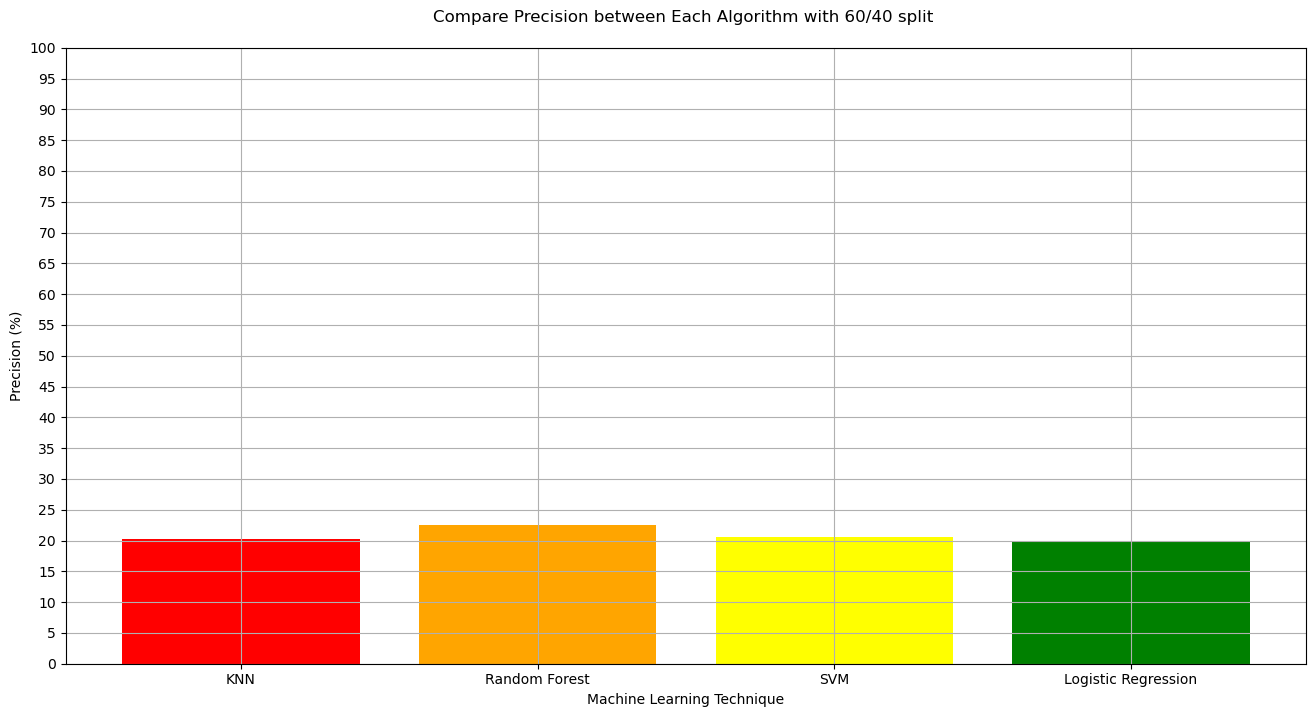

Precision (60/40 split): [20.323741007194247, 22.530329289428074, 20.55785123966942, 19.82049364248317]


In [65]:
# Convert to percentage (multiply by 100)
pre_6040_percent = [score * 100 for score in precision_6040]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=pre_6040_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Precision between Each Algorithm with 60/40 split \n")
plt.ylabel("Precision (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Precision (60/40 split):", pre_6040_percent)        

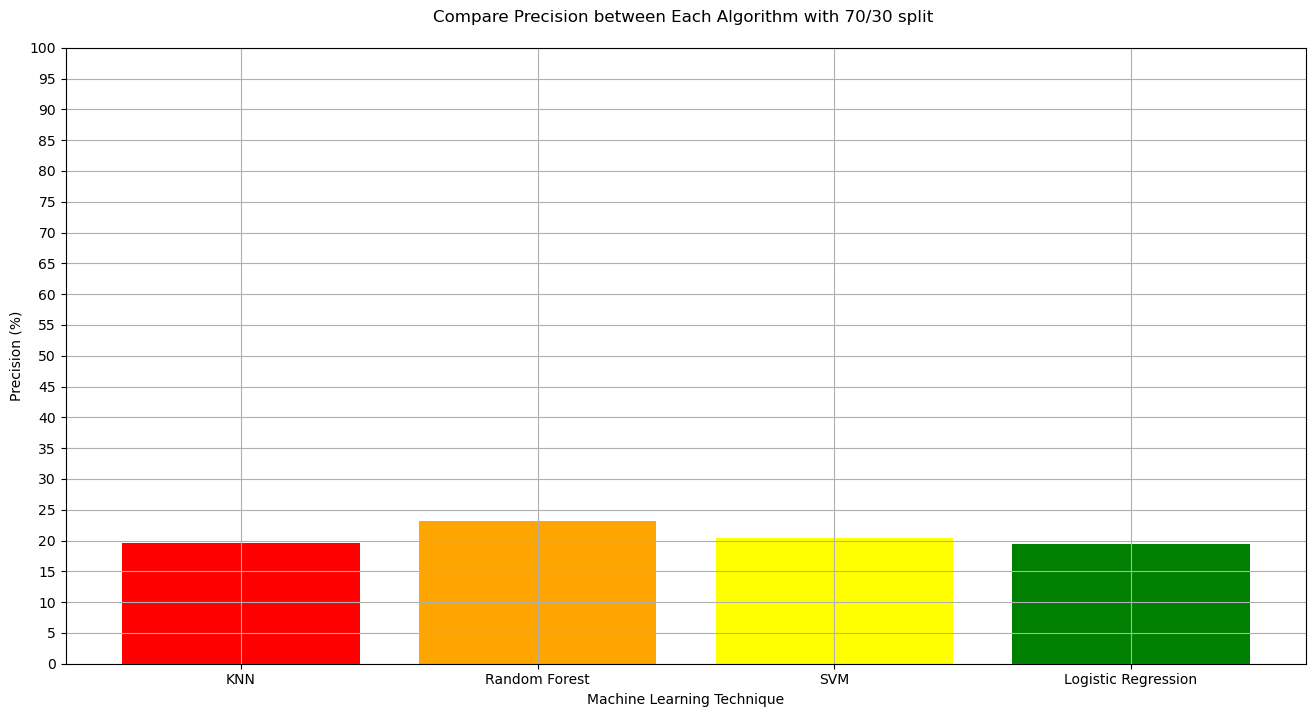

Precision (70/30 split): [19.536019536019538, 23.130841121495326, 20.35623409669211, 19.507389162561577]


In [66]:
# Convert to percentage (multiply by 100)
pre_7030_percent = [score * 100 for score in precision_7030]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=pre_7030_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Precision between Each Algorithm with 70/30 split \n")
plt.ylabel("Precision (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Precision (70/30 split):", pre_7030_percent)        

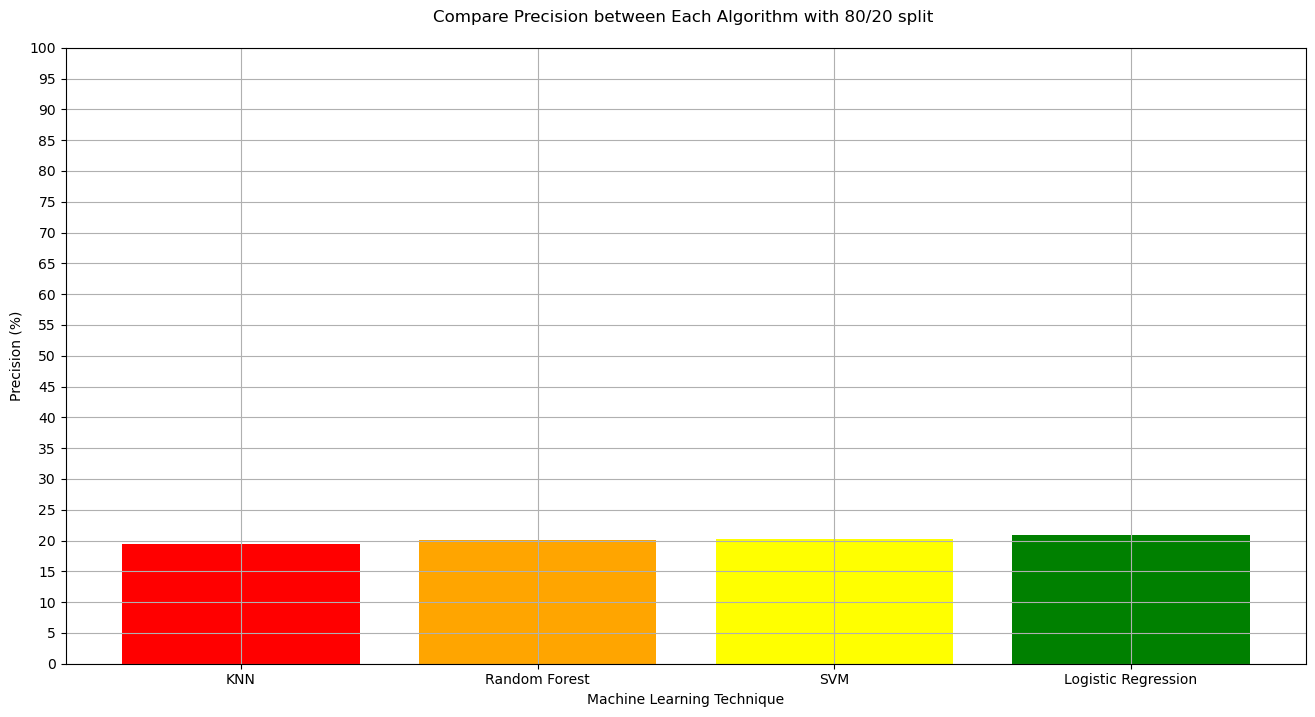

Precision (80/20 split): [19.429590017825312, 20.068027210884352, 20.29250457038391, 20.833333333333336]


In [67]:
# Convert to percentage (multiply by 100)
pre_8020_percent = [score * 100 for score in precision_8020]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=pre_8020_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Precision between Each Algorithm with 80/20 split \n")
plt.ylabel("Precision (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Precision (80/20 split):", pre_8020_percent)     

## 2. Recall

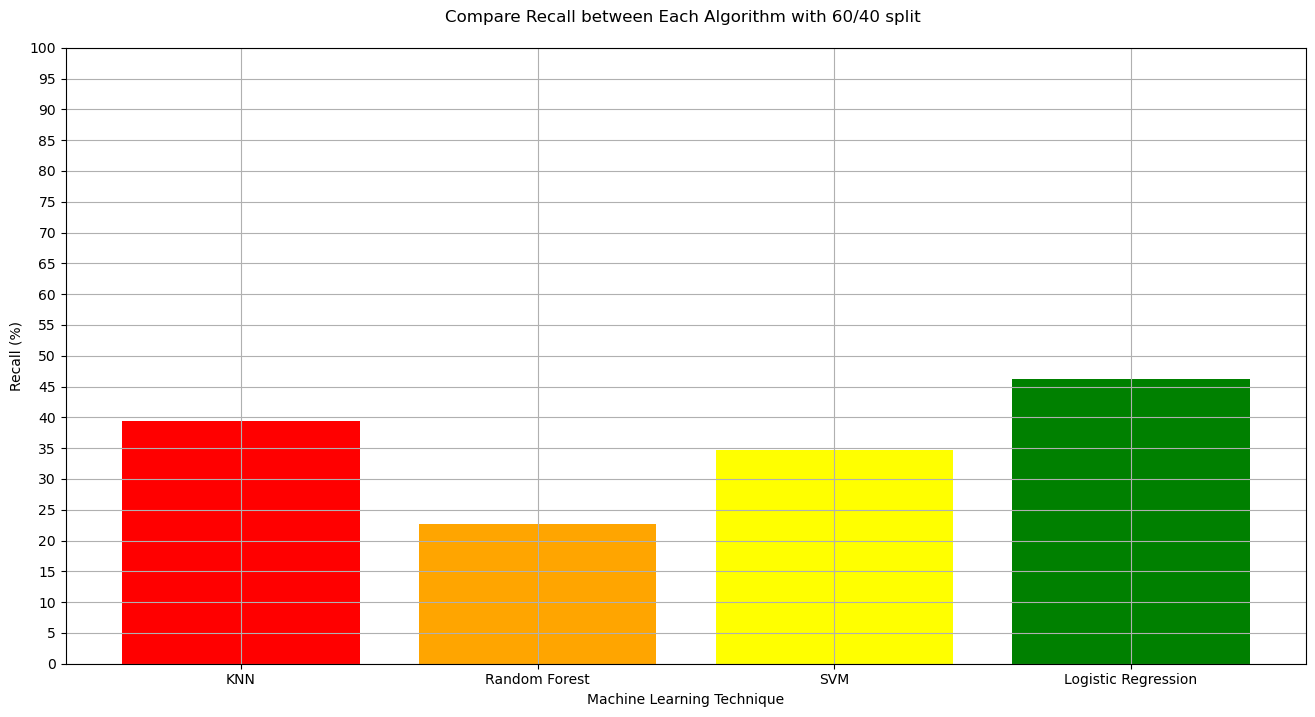

Recall (60/40 split): [39.37282229965157, 22.64808362369338, 34.66898954703833, 46.16724738675958]


In [68]:
# Convert to percentage (multiply by 100)
recall_6040_percent = [score * 100 for score in recall_6040]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=recall_6040_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Recall between Each Algorithm with 60/40 split \n")
plt.ylabel("Recall (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Recall (60/40 split):", recall_6040_percent)        

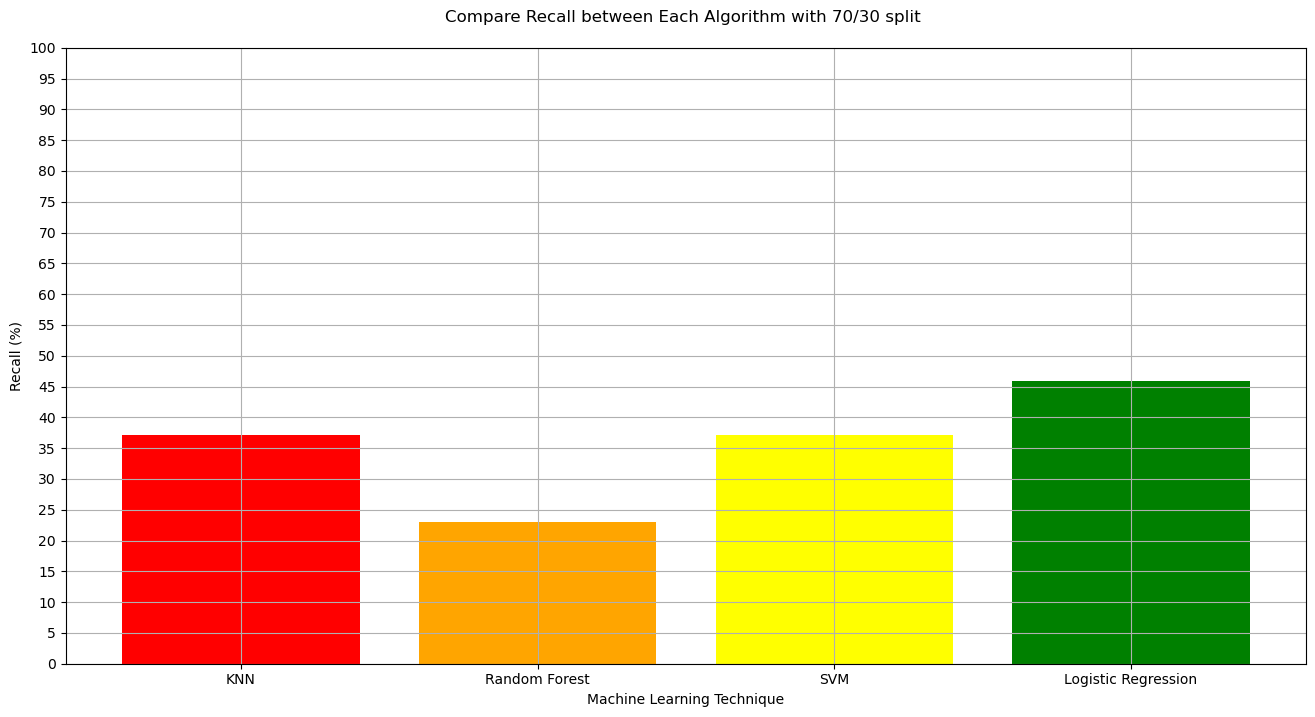

Recall (70/30 split): [37.12296983758701, 22.96983758700696, 37.12296983758701, 45.93967517401392]


In [69]:
# Convert to percentage (multiply by 100)
recall_7030_percent = [score * 100 for score in recall_7030]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=recall_7030_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Recall between Each Algorithm with 70/30 split \n")
plt.ylabel("Recall (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Recall (70/30 split):", recall_7030_percent)        

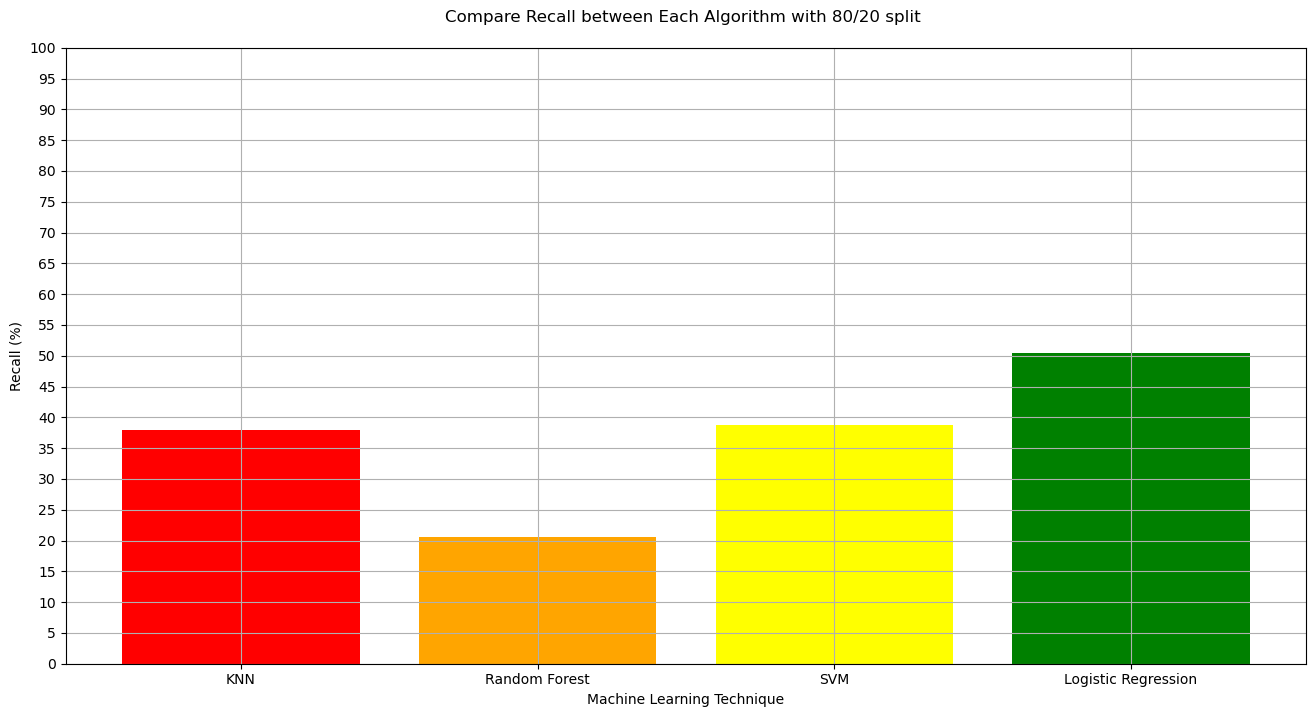

Recall (80/20 split): [37.97909407665505, 20.557491289198605, 38.67595818815331, 50.522648083623686]


In [70]:
# Convert to percentage (multiply by 100)
recall_8020_percent = [score * 100 for score in recall_8020]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=recall_8020_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Recall between Each Algorithm with 80/20 split \n")
plt.ylabel("Recall (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Recall (80/20 split):", recall_8020_percent)        

## 3. F1-score

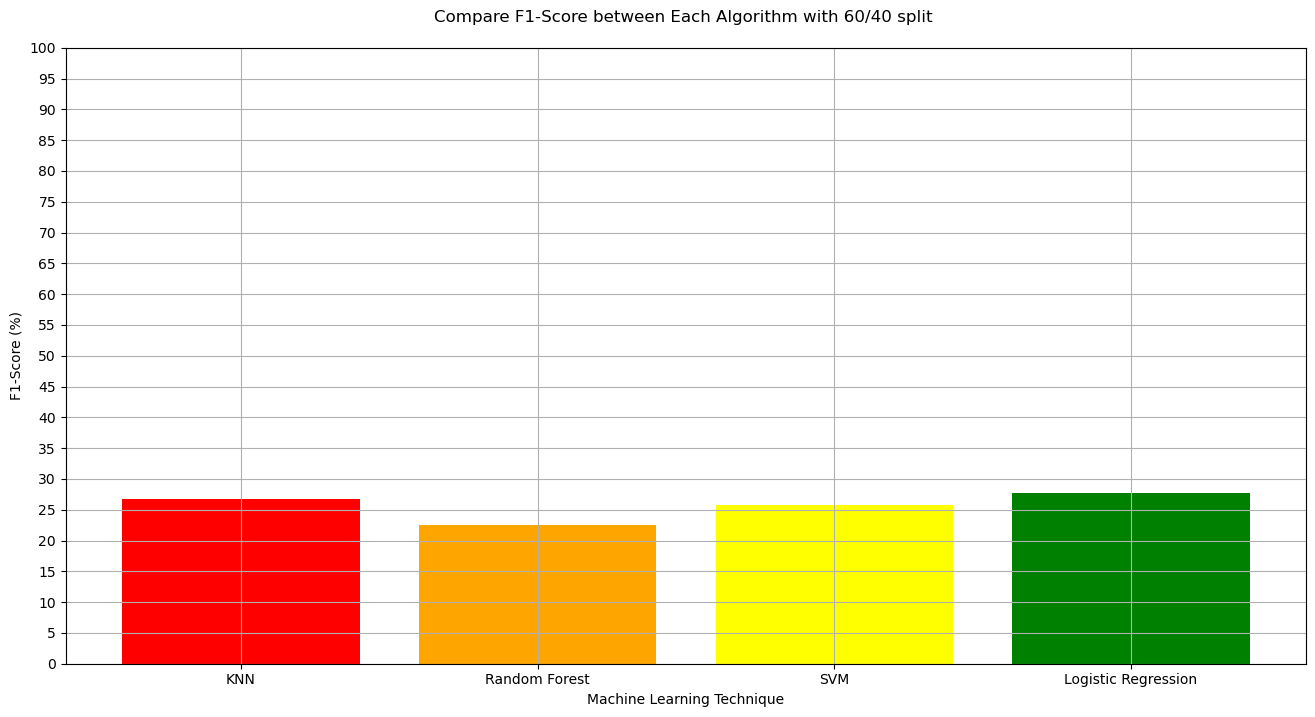

F1-Score (60/40 split): [26.809015421115067, 22.589052997393573, 25.810635538262, 27.73417059131345]


In [71]:
# Convert to percentage (multiply by 100)
f1_6040_percent = [score * 100 for score in f1_6040]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=f1_6040_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare F1-Score between Each Algorithm with 60/40 split \n")
plt.ylabel("F1-Score (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("F1-Score (60/40 split):", f1_6040_percent)   

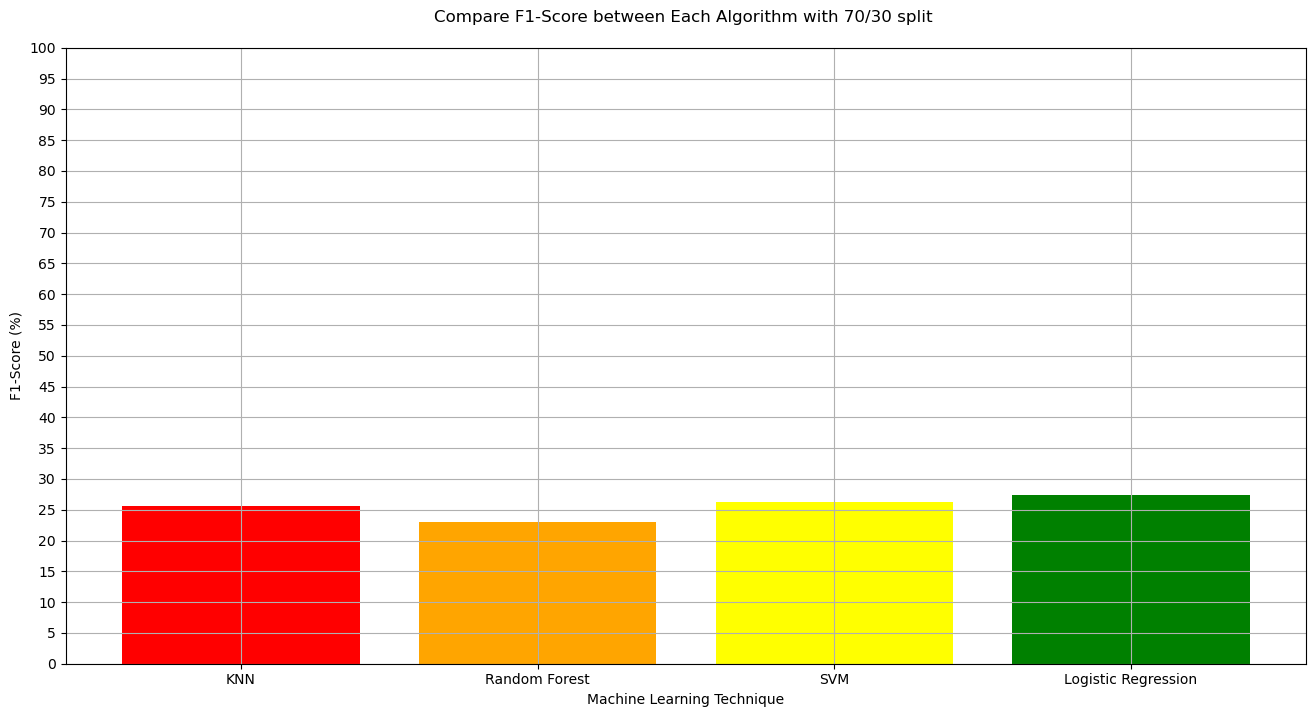

F1-Score (70/30 split): [25.6, 23.050058207217695, 26.294165981922763, 27.385892116182575]


In [72]:
# Convert to percentage (multiply by 100)
f1_7030_percent = [score * 100 for score in f1_7030]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=f1_7030_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare F1-Score between Each Algorithm with 70/30 split \n")
plt.ylabel("F1-Score (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("F1-Score (70/30 split):", f1_7030_percent)   

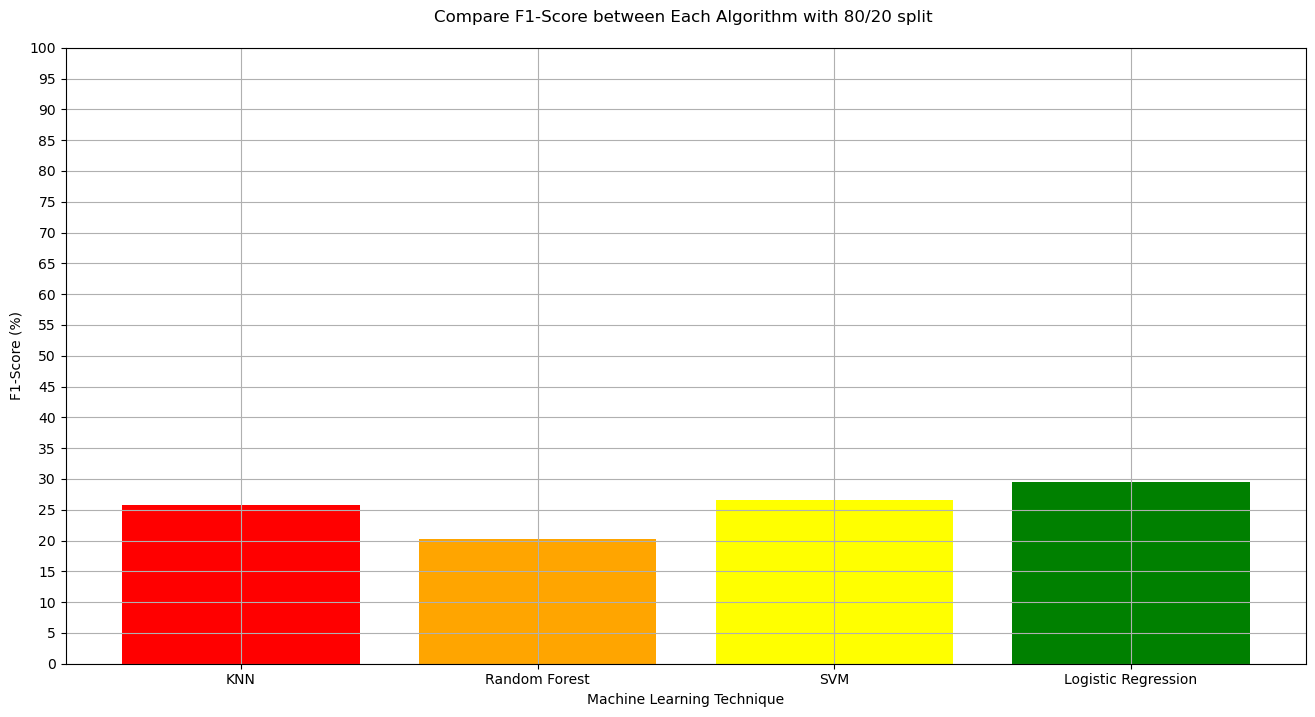

F1-Score (80/20 split): [25.707547169811324, 20.309810671256454, 26.618705035971225, 29.50152594099695]


In [73]:
# Convert to percentage (multiply by 100)
f1_8020_percent = [score * 100 for score in f1_8020]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=f1_8020_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare F1-Score between Each Algorithm with 80/20 split \n")
plt.ylabel("F1-Score (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("F1-Score (80/20 split):", f1_8020_percent)   

## 4. Accuracy

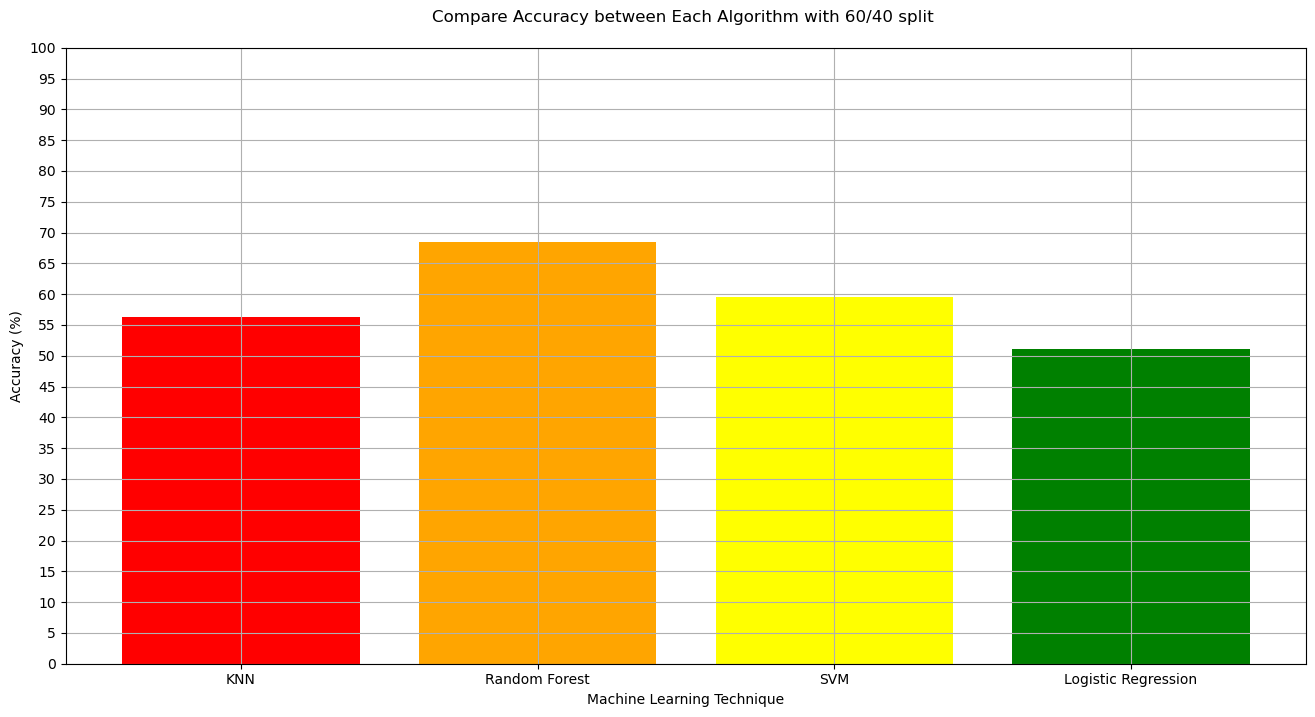

Accuracy (60/40 split): [56.349487088786695, 68.48249027237354, 59.53307392996109, 51.1496285815352]


In [74]:
# Convert to percentage (multiply by 100)
accuracy_6040_percent = [score * 100 for score in accuracy_6040]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=accuracy_6040_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Accuracy between Each Algorithm with 60/40 split \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Accuracy (60/40 split):", accuracy_6040_percent)

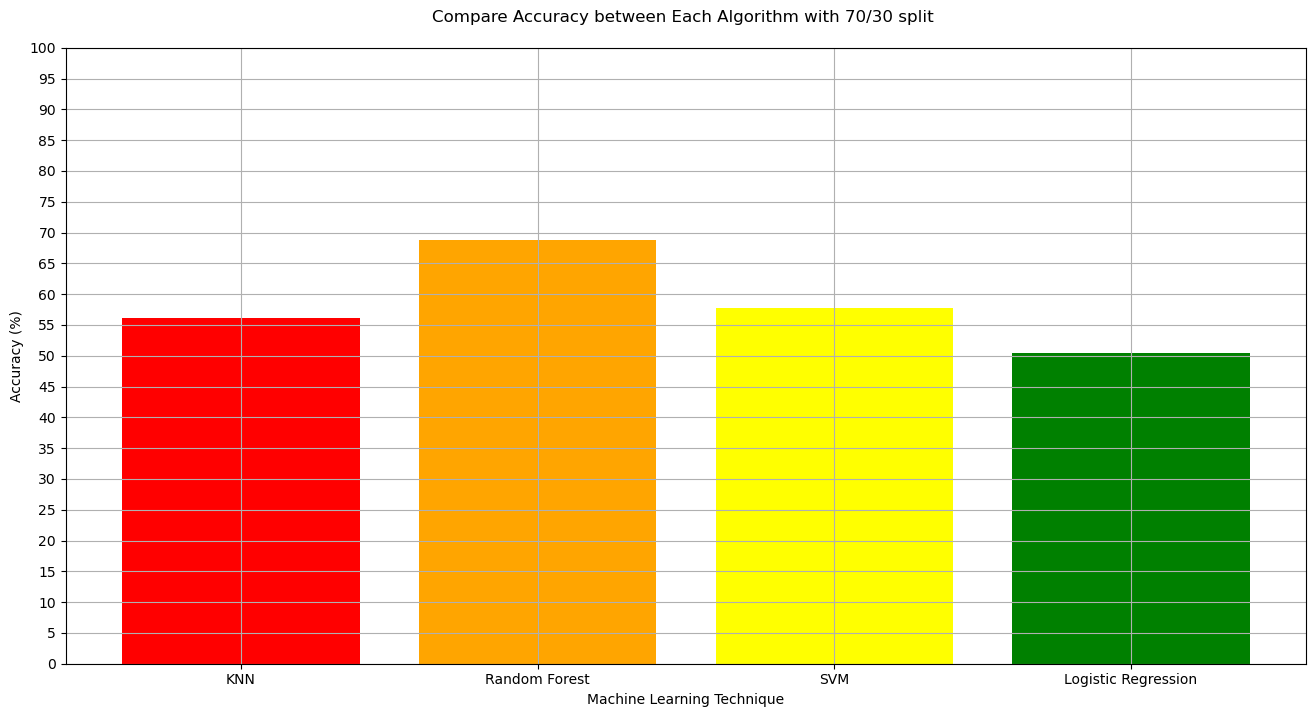

Accuracy (70/30 split): [56.15275813295615, 68.83545497406884, 57.708628005657715, 50.495049504950494]


In [75]:
# Convert to percentage (multiply by 100)
accuracy_7030_percent = [score * 100 for score in accuracy_7030]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=accuracy_7030_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Accuracy between Each Algorithm with 70/30 split \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Accuracy (70/30 split):", accuracy_7030_percent)

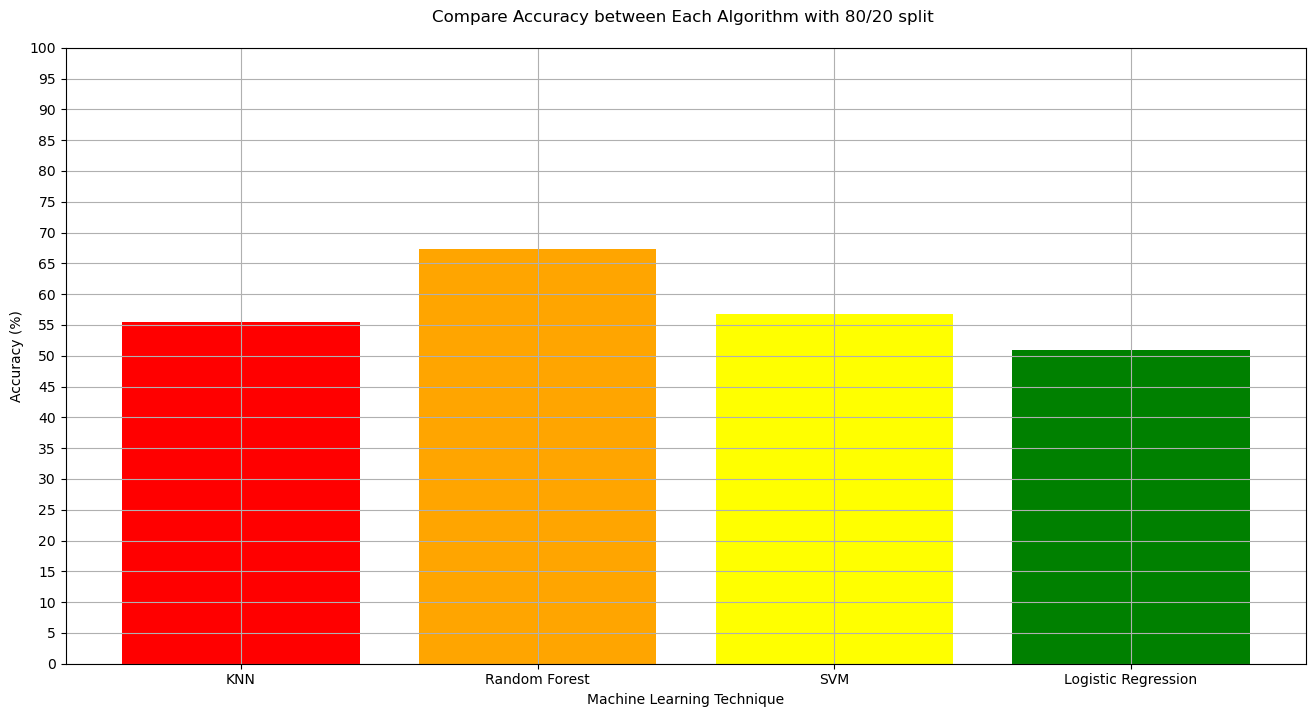

Accuracy (80/20 split): [55.44554455445545, 67.25601131541725, 56.71852899575672, 50.99009900990099]


In [76]:
# Convert to percentage (multiply by 100)
accuracy_8020_percent = [score * 100 for score in accuracy_8020]

plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=accuracy_8020_percent, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Compare Accuracy between Each Algorithm with 80/20 split \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Technique")
plt.show()
print("Accuracy (80/20 split):", accuracy_8020_percent)

## 5. ROC-AUC Score

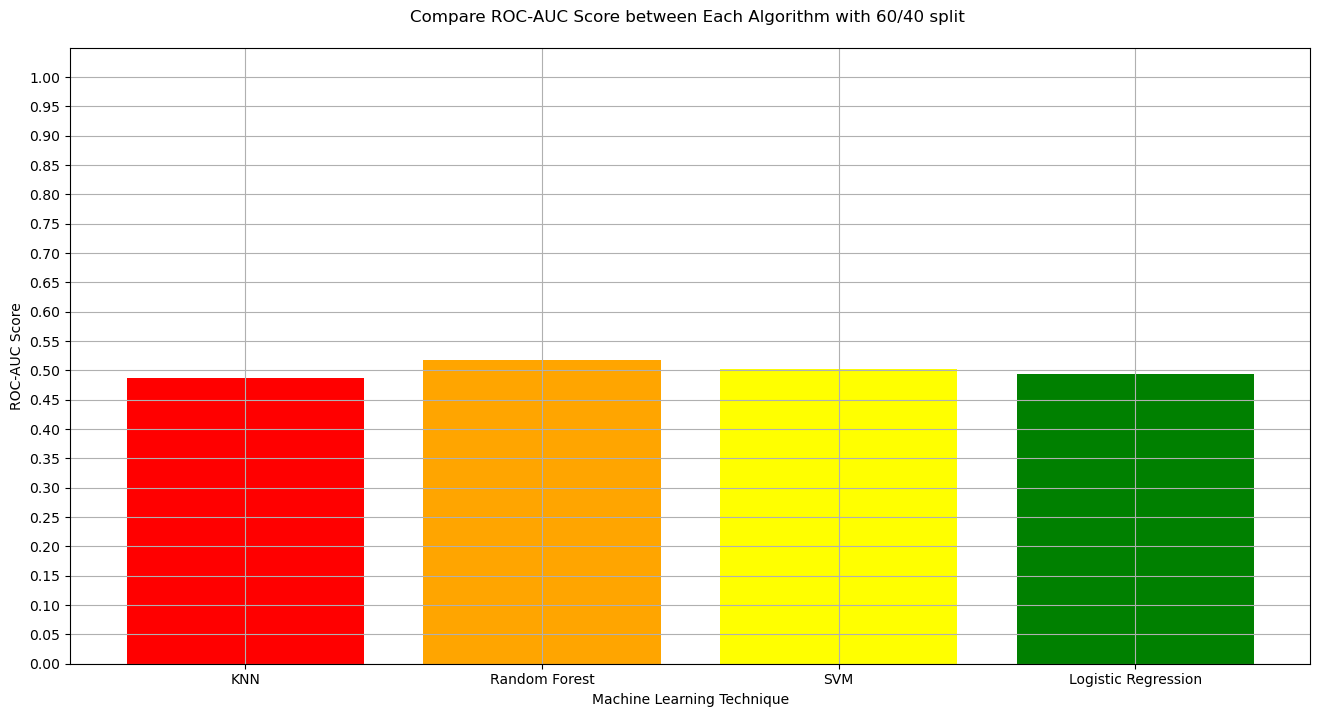

ROC-AUC Score (60/40 split): [np.float64(0.4870161503593351), np.float64(0.5183042818634387), np.float64(0.5031835214680851), np.float64(0.49302749257281425)]


In [79]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=roc_6040, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,1.05))
plt.yticks(np.arange(0,1.05,0.05))
plt.title("Compare ROC-AUC Score between Each Algorithm with 60/40 split \n")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Machine Learning Technique")
plt.show()
print("ROC-AUC Score (60/40 split):", roc_6040)

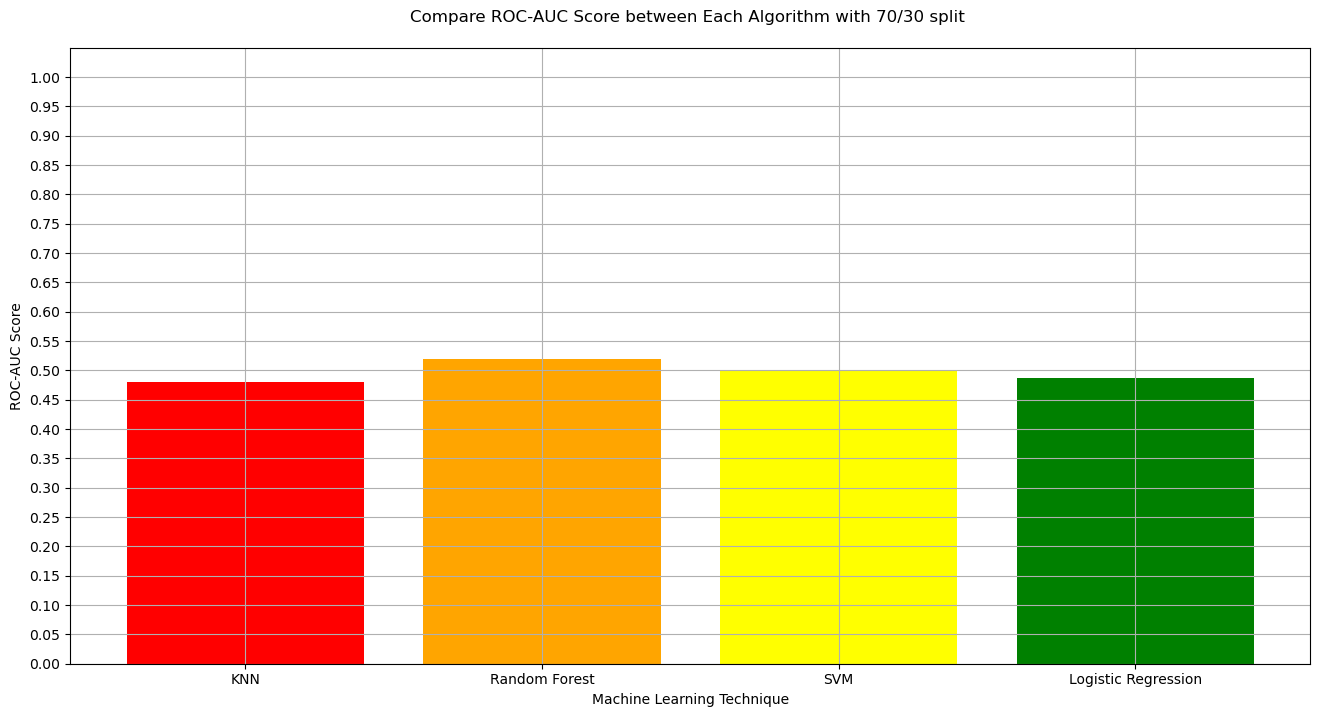

ROC-AUC Score (70/30 split): [np.float64(0.4805282884169195), np.float64(0.5188182155164129), np.float64(0.49921745218907454), np.float64(0.4870357912656681)]


In [81]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=roc_7030, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,1.05))
plt.yticks(np.arange(0,1.05,0.05))
plt.title("Compare ROC-AUC Score between Each Algorithm with 70/30 split \n")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Machine Learning Technique")
plt.show()
print("ROC-AUC Score (70/30 split):", roc_7030)

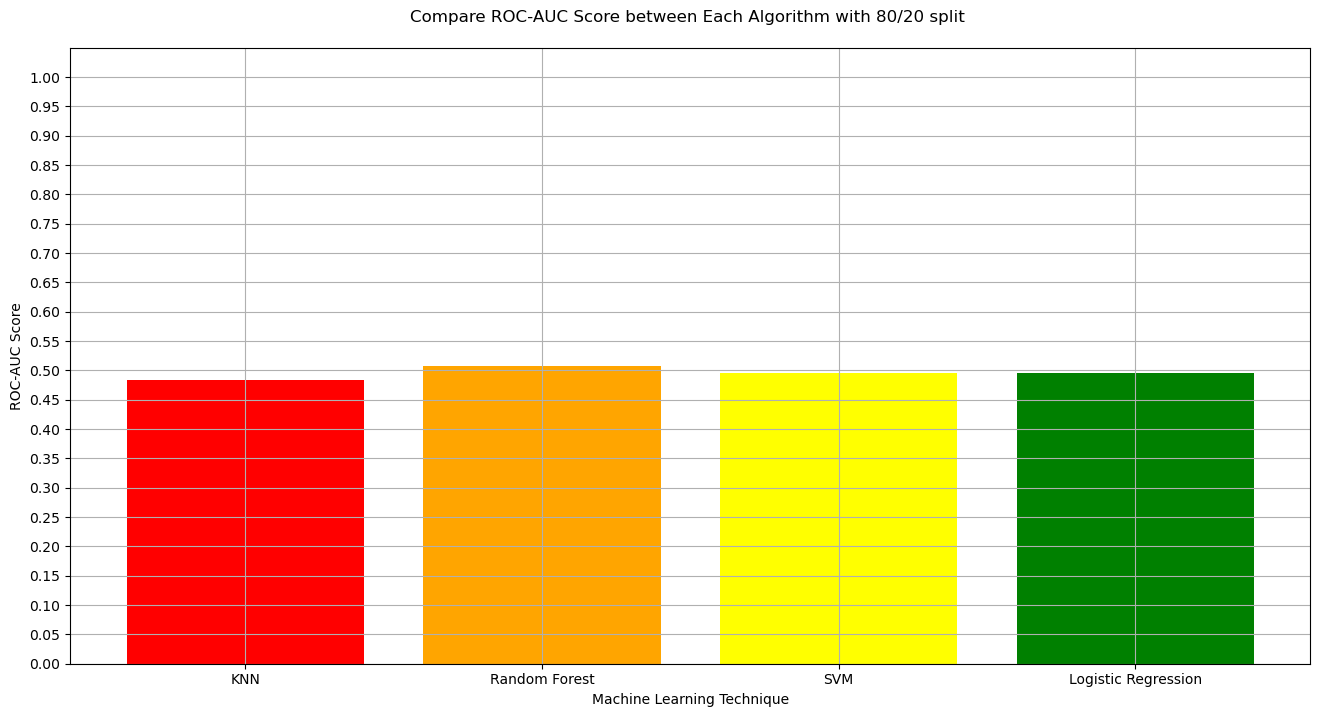

ROC-AUC Score (80/20 split): [np.float64(0.48382434325040424), np.float64(0.5080383615345851), np.float64(0.4949435614269947), np.float64(0.49601328184659715)]


In [82]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.bar(x=model, height=roc_8020, color=['red', 'orange', 'yellow', 'green'])
plt.xticks()
plt.ylim((0,1.05))
plt.yticks(np.arange(0,1.05,0.05))
plt.title("Compare ROC-AUC Score between Each Algorithm with 80/20 split \n")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Machine Learning Technique")
plt.show()
print("ROC-AUC Score (80/20 split):", roc_8020)

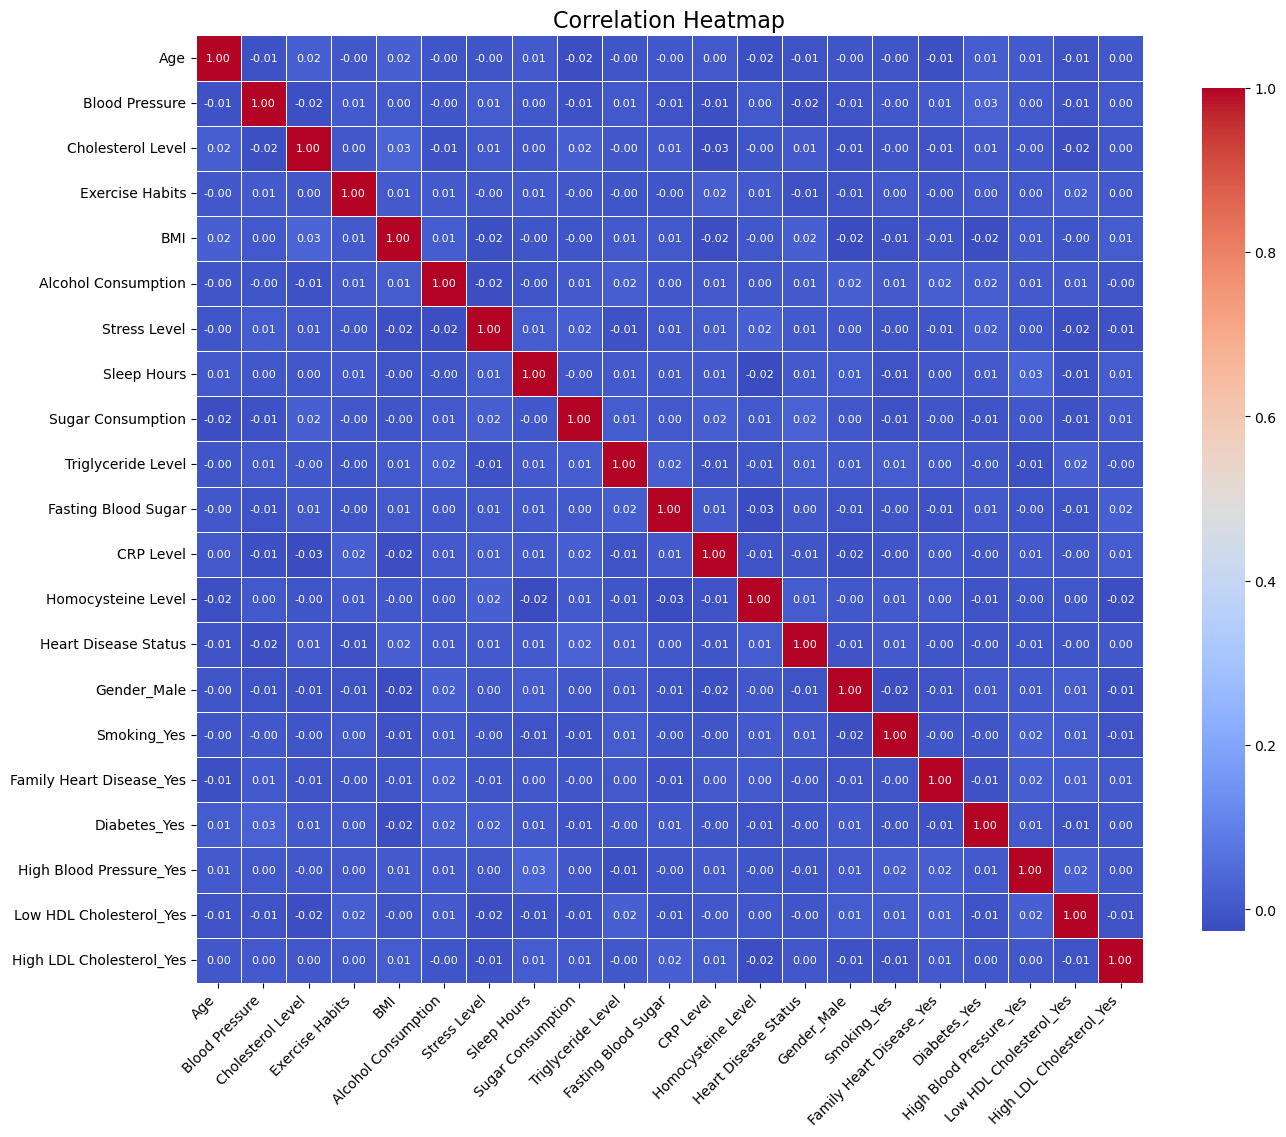

In [55]:
# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()